# Análisis de tasa de cancelación de clientes en banco ABC

## Introducción

En este proyecto se llevará a cabo un análisis de datos relacionados con clientes que han cancelado su servicio en el banco multinacional ABC. El objetivo principal es identificar *insights* relevantes a partir del conjunto de datos que permitan predecir de manera efectiva la deserción de clientes. Además, utilizando estos datos se desarrollarán modelos de Machine Learning y Deep Learning que permitarán detectar potenciales deserciones de clientes de manera oportuna, para así implementar estrategias de retención.

El conjunto de datos que será utilizado fue obtenido del repositorio Kaggle y se encuentra disponible en el siguiente enlace: [Bank Customer Churn Dataset](https://www.kaggle.com/datasets/gauravtopre/bank-customer-churn-dataset/data)

## Carga y descripción del conjunto de datos

Para realizar el análisis de datos, importamos algunas de las librerías que se requeriran.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
#matplotlib inline

Importamos el conjunto de datos e imprimimos las primeras instancias.

In [2]:
df_raw = pd.read_csv('C:/Users/Adrej/OneDrive/Escritorio/Proyectos/Bank Customer Churn Prediction/Bank Customer Churn Prediction.csv')
df_raw.head()

customer_id  credit_score country  gender  age  tenure    balance  \
0     15634602           619  France  Female   42       2       0.00   
1     15647311           608   Spain  Female   41       1   83807.86   
2     15619304           502  France  Female   42       8  159660.80   
3     15701354           699  France  Female   39       1       0.00   
4     15737888           850   Spain  Female   43       2  125510.82   

   products_number  credit_card  active_member  estimated_salary  churn  
0                1            1              1         101348.88      1  
1                1            0              1         112542.58      0  
2                3            1              0         113931.57      1  
3                2            0              0          93826.63      0  
4                1            1              1          79084.10      0

Como en la mayoría de los conjuntos de datos, este dataset está compuesto por variables numéricas y categóricas. A continuación, se describen brevemente dichas variables:

**Variables numéricas:**
- `credit_score`: Puntaje crediticio basado en el análisis del historial financiero del cliente. Representa su solvencia, y usualmente varía en un rango de 300 a 850.
- `age`: Edad del cliente.
- `tenure`: Años de antigüedad del cliente como usuario del banco.
- `balance`: Saldo actual en la cuenta del cliente.
- `products_number`: Número de productos o servicios financieros contratados (por ejemplo, tarjeta de crédito, débito, préstamos, etc.).
- `estimated_salary`: Ingreso estimado del cliente, ya sea reportado o inferido, generalmente expresado en términos anuales.

**Variables categóricas**:
- `country`: País de residencia del cliente.
- `gender`: Género del cliente.
- `credit_card`: Variable binaria que indica si el cliente posee una tarjeta de crédito emitida por el banco ABC.
- `active_member`: Variable binaria que señala si el cliente ha estado activo recientemente (por ejemplo, mediante transacciones u operaciones bancarias).

**Variable objetivo**:
- `churn`: Variable binaria que indica si el cliente ha cancelado su servicio con el banco (0: No, 1: Sí).

Adicionalmente, el conjunto de datos contiene la variable `customer_id`, que corresponde únicamente al identificador único del cliente. Dado que no aporta información útil para el análisis predictivo, se excluirá del conjunto de características.

In [3]:
df_raw = df_raw.drop(columns = ['customer_id'])

A continuación, se presentan los tipos de datos de cada una de las variables del conjunto.

In [4]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   credit_score      10000 non-null  int64  
 1   country           10000 non-null  object 
 2   gender            10000 non-null  object 
 3   age               10000 non-null  int64  
 4   tenure            10000 non-null  int64  
 5   balance           10000 non-null  float64
 6   products_number   10000 non-null  int64  
 7   credit_card       10000 non-null  int64  
 8   active_member     10000 non-null  int64  
 9   estimated_salary  10000 non-null  float64
 10  churn             10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


Se observa que el conjunto de datos contiene 10,000 instancias y que no presenta valores nulos en ninguna de sus variables, por lo que no será necesario realizar un proceso de limpieza en el preprocesamiento. A continuación, se muestran las distribuciones generales de las variables, así como un resumen estadístico de sus características numéricas.

In [5]:
df_raw.describe(include = 'all')

credit_score country gender           age        tenure  \
count   10000.000000   10000  10000  10000.000000  10000.000000   
unique           NaN       3      2           NaN           NaN   
top              NaN  France   Male           NaN           NaN   
freq             NaN    5014   5457           NaN           NaN   
mean      650.528800     NaN    NaN     38.921800      5.012800   
std        96.653299     NaN    NaN     10.487806      2.892174   
min       350.000000     NaN    NaN     18.000000      0.000000   
25%       584.000000     NaN    NaN     32.000000      3.000000   
50%       652.000000     NaN    NaN     37.000000      5.000000   
75%       718.000000     NaN    NaN     44.000000      7.000000   
max       850.000000     NaN    NaN     92.000000     10.000000   

              balance  products_number  credit_card  active_member  \
count    10000.000000     10000.000000  10000.00000   10000.000000   
unique            NaN              NaN          NaN            NaN   
top               NaN              NaN          NaN            NaN   
freq              NaN              NaN          NaN            NaN   
mean     76485.889288         1.530200      0.70550       0.515100   
std      62397.405202         0.581654      0.45584       0.499797   
min          0.000000         1.000000      0.00000       0.000000   
25%          0.000000         1.000000      0.00000       0.000000   
50%      97198.540000         1.000000      1.00000       1.000000   
75%     127644.240000         2.000000      1.00000       1.000000   
max     250898.090000         4.000000      1.00000       1.000000   

        estimated_salary         churn  
count       10000.000000  10000.000000  
unique               NaN           NaN  
top                  NaN           NaN  
freq                 NaN           NaN  
mean       100090.239881      0.203700  
std         57510.492818      0.402769  
min            11.580000      0.000000  
25%         51002.110000      0.000000  
50%        100193.915000      0.000000  
75%        149388.247500      0.000000  
max        199992.480000      1.000000

Observamos que la variable de países (`contry`) contiene sólo 3 valores distintos, los cuales son:

In [6]:
df_raw['country'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

Por último, revisaremos la variable objetivo `churn` lo cual nos permitirá conocer la distribución de las instancias del conjunto de datos.

In [7]:
df_raw['churn'].value_counts()

churn
0    7963
1    2037
Name: count, dtype: int64

Como se puede observar, la variable objetivo presenta un desequilibrio en la distribución de clases, por lo cual es importante tener precaución al momento de entrenar modelos, ya que podrían inclinarse a favorecer la clase mayoritaria, lo que resultaría en un sobreajuste y un rendimiento deficiente en la detección de la clase minoritaria.

## Preprocesamiento de datos

Como se revisó en los tipos de variables, la variable `gender` está codificada como una cadena de texto (`string`). Para facilitar el uso de esta variable se convertirá a variable numérica. Para ello, se asignarán los siguientes valores:
* `Male`: 0
* `Female`: 1

In [8]:
df_raw['gender'] = df_raw['gender'].map({'Male': 0, 'Female': 1})

## Análisis exploratorio de datos

Se analizarán las distribuciones de las variables para cada una de las dos clases de la variable objetivo: clientes que han abandonado el servicio y clientes que mantenienen. Este análisis permitirá identificar diferencias en los patrones de comportamiento entre ambos grupos, lo cual es útil para la detección de *insights* y así construir modelos predictivos más precisos.

### Análisis de variables continuas

Empezaremos realizando un análisis de distribuciones para las distintas variables numéricas.

In [9]:
numerical_vars = ['credit_score', 'age', 'tenure', 'balance', 'products_number', 'estimated_salary']

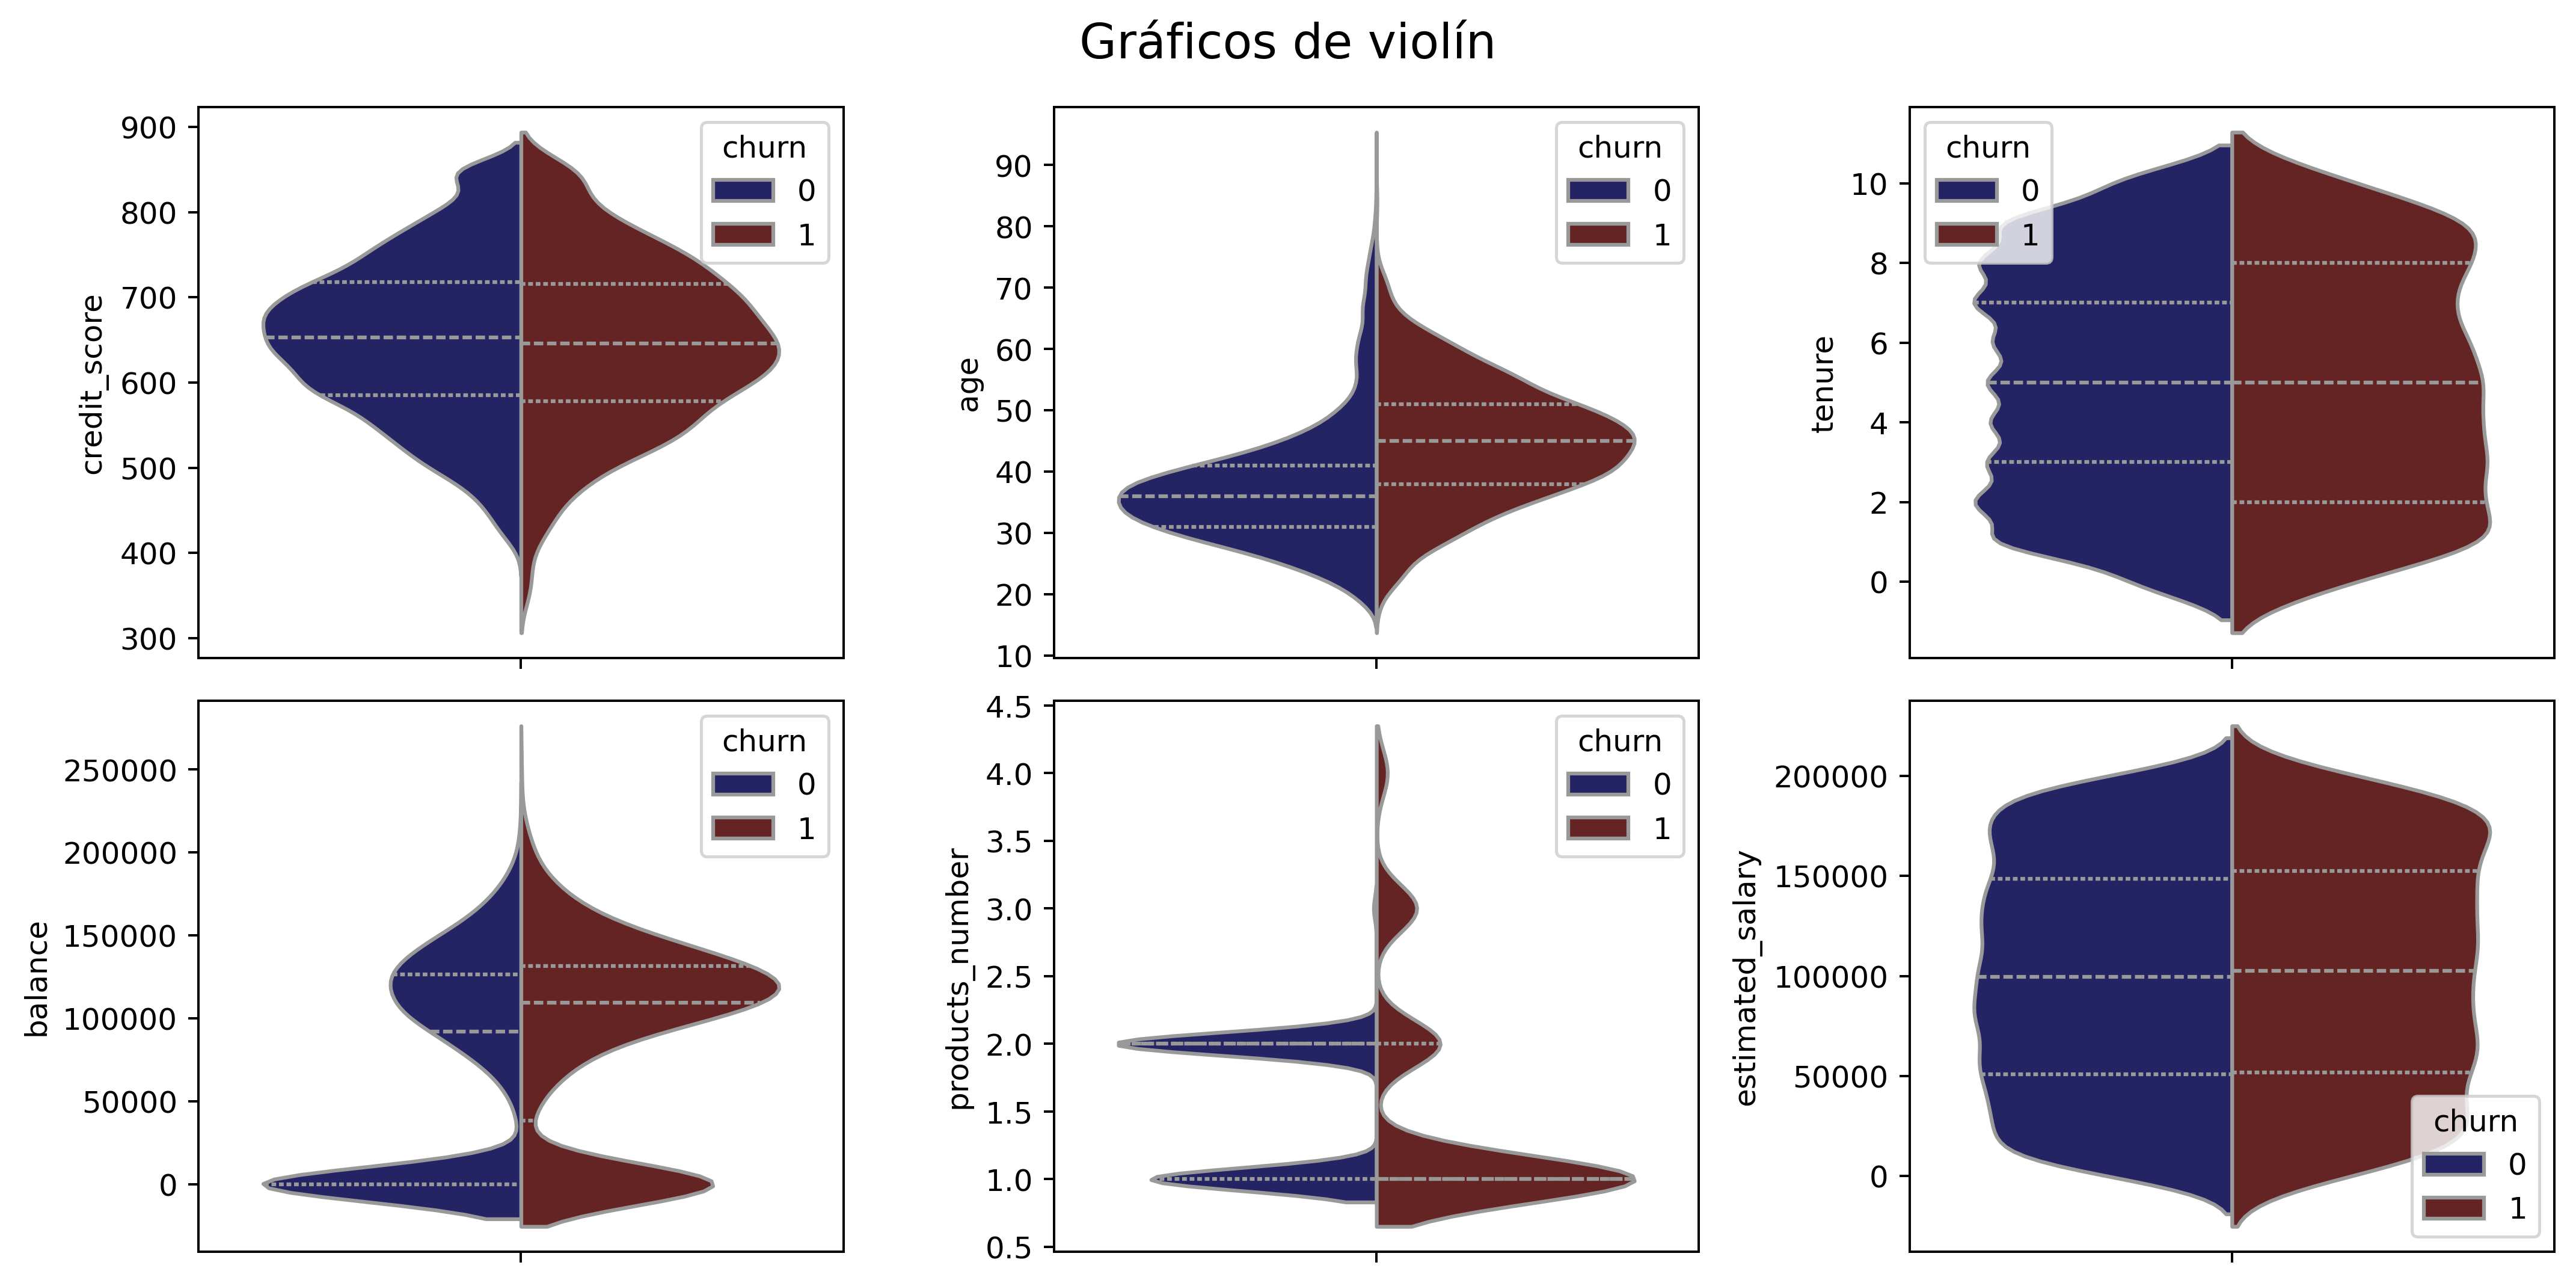

In [10]:
churn_colors = ['#191970', '#701919']
    
fig, axs = plt.subplots(nrows = 2, ncols = 3, dpi = 360, figsize = (12,6))
fig.suptitle('Gráficos de violín', fontsize = 16)
for i, var in enumerate(numerical_vars):
    row, col = divmod(i,3)
    sns.violinplot(data=df_raw, y=var, hue = 'churn',
                   palette=churn_colors, split=True, inner='quart', ax = axs[row][col], fill = True, linecolor = '#999999')
    axs[row][col].set_ylabel(var)
plt.tight_layout()
plt.show()


A partir de los gráficos de violín generados, es posible extraer algunas observaciones relevantes sobre el comportamiento de los clientes que abandonan o permanecen en la institución financiera. A continuación, se presentan los principales hallazgos junto con preguntas que permitirán realizar un análisis estadístico más profundo:

- **Similitud en distribuciones de algunas variables**: A simple vista, las distribuciones de puntaje crediticio (`credit_score`), antigüedad en el banco (`tenure`) y salario estimado (`estimated_salary)` parecen ser similares entre los clientes que abandonaron y los que permanecen en la institución.

**¿Es esto cierto desde el punto de vista estadístico? ¿Qué variables numéricas presentan distribuciones similares entre ambos grupos?**

- **Edad como posible factor determinante**: Se observa que la mayoría de los clientes que abandonan el banco tienen edades comprendidas entre los 37 y 52 años, con una media cercana a los 44 años.

**¿Podemos afirmar estadísticamente que los clientes que abandonan tienden a ser mayores que los que permanecen? ¿Existen otras variables cuya media difiera significativamente entre ambos grupos?**

- **Relación entre saldo y abandono**: Proporcionalmente, parece que los clientes con un saldo igual a $0 en su cuenta tienen mayor tendencia a permanecer en el banco, mientras que aquellos con saldos superiores a la media muestran una mayor propensión a abandonarlo.

**¿Cómo se distribuye el saldo entre los clientes que se quedan y los que se van?**

- **Número de productos contratados**: En la distribución de clientes que han abandonado el banco, se observa un número considerable de casos con tres o cuatro productos contratados, patrón menos evidente entre los clientes que no han abandonado. Además, la mayoría de los clientes que no han abandonado tienden a tener dos productos, mientras que entre los que sí han abandonado, predomina tener solo un producto.

**¿Existe evidencia estadística de que los clientes con un solo producto tienen mayor probabilidad de abandonar el banco? ¿Cómo se asigna el número de productos a cada cliente? ¿Podría tratarse de una estrategia de retención el ofrecer más productos a clientes en riesgo de abandono? ¿Existe una relación entre la imposibilidad de adquirir más productos y la decisión de abandonar?**

En las siguientes secciones se abordarán estas preguntas mediante análisis estadísticos apropiados, con el fin de confirmar o descartar las hipótesis planteadas a partir de la inspección visual.

**1. Similitud en distribuciones de algunas variables**

Si bien el gráfico de violín sirve para identificar variaciones en las distribuciones de los datos, el gráfico de la función de distribución acumulada, o *CDF*, permite una comparación entre las distribuciones de las dos clases de manera más clara. A continuación obtenemos los gráficos CDF para las distintas variables.

In [11]:
df_NoChurn  = df_raw[df_raw['churn']==0]
df_Churn  = df_raw[df_raw['churn']==1]

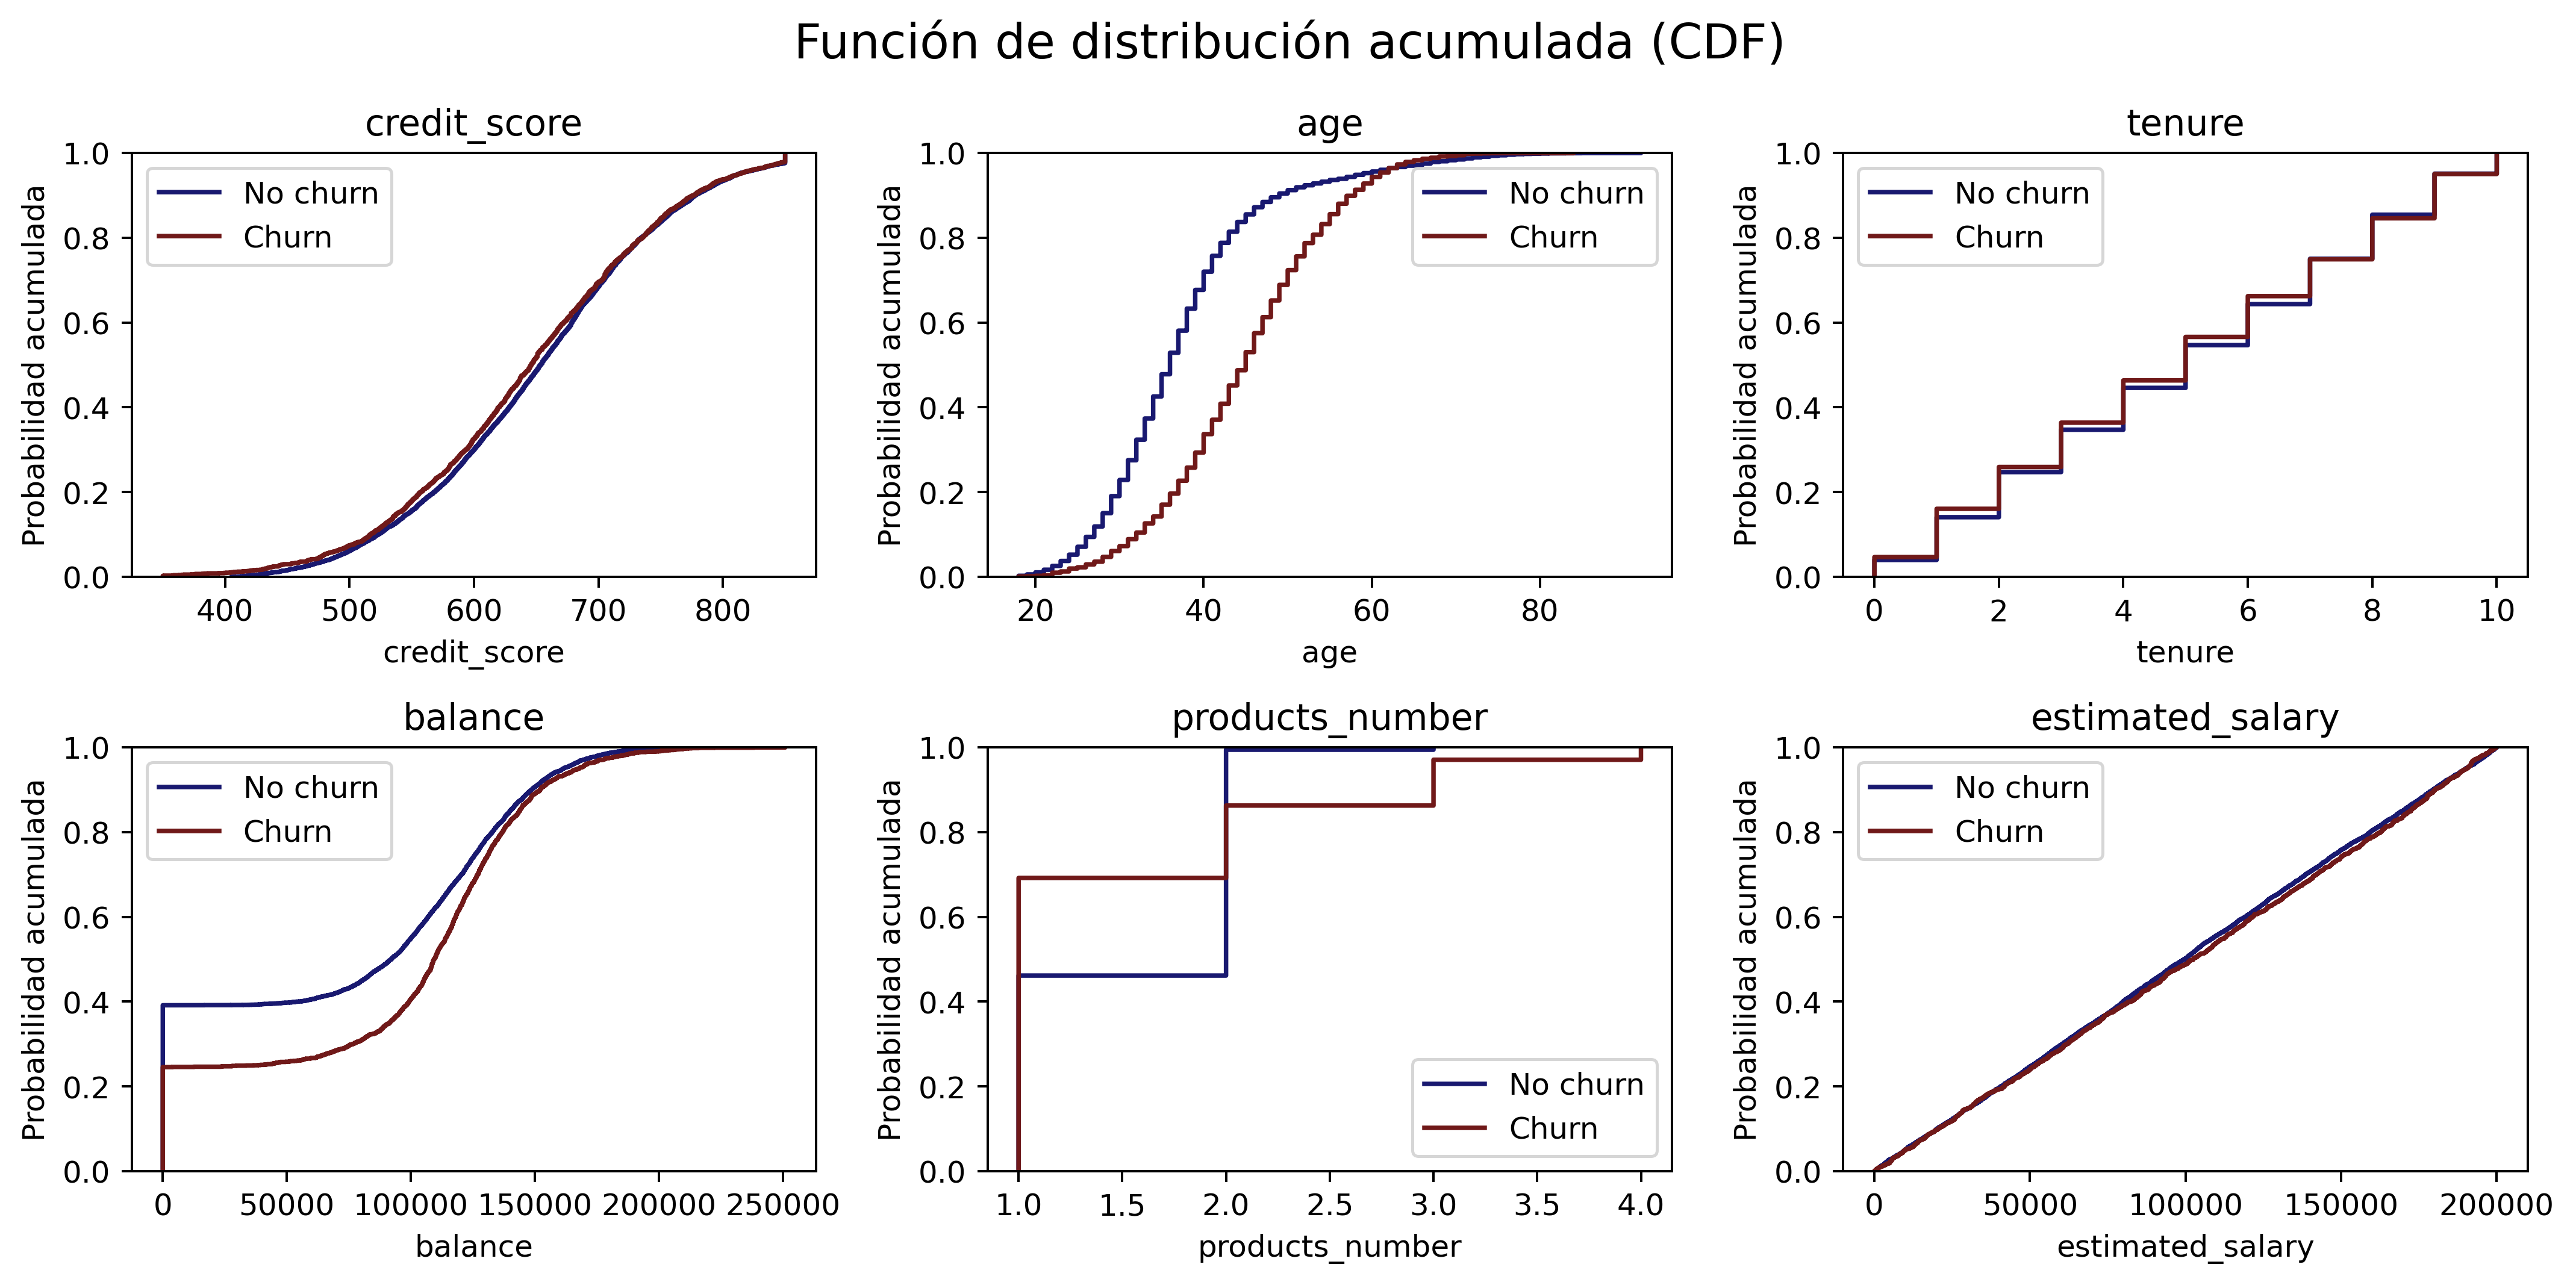

In [12]:
fig, axs = plt.subplots(nrows = 2, ncols = 3, figsize=(12,6), dpi = 360)
fig.suptitle('Función de distribución acumulada (CDF)', fontsize = 16)
for i,var in enumerate(numerical_vars):
    row, col = divmod(i,3)
    axs[row,col].set_title(var)
    axs[row,col].ecdf(df_NoChurn[var], color = churn_colors[0], label = 'No churn')
    axs[row,col].ecdf(df_Churn[var], color = churn_colors[1], label = 'Churn')
    axs[row,col].legend()
    axs[row,col].set_ylabel('Probabilidad acumulada')
    axs[row,col].set_xlabel(var)
plt.tight_layout()
plt.show()

A partir de estas gráficas se puede comparar las distribuciones de ambos grupo desde otro enfoque. Se observa que la edad media de personas que abandonan la institución financiera es mayor que la edad media de las que permanecen. De igual forma, se observa que alrededor del 40\% de todas las personas que permanecen en el banco tienen $\$0$ en su cuenta, mientras que el porcentaje que abandona con $\$0$ de saldo es solo del 25\%. Por otra parte, se aprecia que el 65\% de personas que abandonan la institución cuentan con un solo producto y que son estas las únicas que cuentan con tres y cuatro productos, viendose la cantidad de productos de las personas que permanecen a lo más dos.

Se utilizará la prueba *Kolmogorov-Smirnov* para dos muestras para corroborar si las distribuciones entre los clientes que abandonan y permenecen para las distintas son iguales para las distintas variables.

In [13]:
print('-----Prueba Kolmogorov-Smirnov de dos muestras-----')
for var in numerical_vars:
    res = stats.ks_2samp(df_NoChurn[var], df_Churn[var])
    print(f"{var}: p-value = {res.pvalue:.4f}")

-----Prueba Kolmogorov-Smirnov de dos muestras-----
credit_score: p-value = 0.0301
age: p-value = 0.0000
tenure: p-value = 0.5434
balance: p-value = 0.0000
products_number: p-value = 0.0000
estimated_salary: p-value = 0.3250


Con lo anterior, se obtiene que estadísticamente no hay diferencia significativa entre la distribución de los datos de `tenure` y `estimated_salary` para clientes con abandono y sin abandono, mientras que para las demás variables numéricas sí existen diferencias significativas entre las distintras distribuciones de datos.

**2. Edad como posible factor determinante y variación de media entre grupos**

Una prueba para analizar si la media de una muestra tiene valores más altos que otra muestra, sin asumir normalidad, es la prueba de *Mann-Whitney U*. Se debe de tener cuidado con esta prueba ya que no es exactamente la alternativa no paramétrica de la prueba *t*, sin embargo, puede ser utilizado de manera aproximada. Implementando esta prueba para cada una de las variables numéricas se obtiene lo siguiente:

In [14]:
print('-----Prueba Mann–Whitney U-----')
for var in numerical_vars:
    res = stats.mannwhitneyu(df_NoChurn[var], df_Churn[var])
    print(f"{var} p-value = {res.pvalue:.4f}")

-----Prueba Mann–Whitney U-----
credit_score p-value = 0.0199
age p-value = 0.0000
tenure p-value = 0.1622
balance p-value = 0.0000
products_number p-value = 0.0000
estimated_salary p-value = 0.2271


De igual forma, que con la prueba Kolmogorov-Smirnov, la prueba de *Mann-Whitney U* indica que existen diferencias significativas en clientes con abandono y permanencias en las variables numéricas excepto en `tenure` y `estimated_salary`. Con esta prueba, se afirma estadísticamente que la media de las personas que abandonan es distinta que de las que permanecen en las variables de `credit_score`, `age`, `balance` y `products_number`

**3. Relación entre saldo y abandono**

En el gráfico de violín y en la gráfica de CDF se observó que las distribuciones de `balance` de ambos grupos son relativamente parecidas, sin embargo, todas las pruebas de Kolmogorov-Smirnov y Mann-Whitney U arrojaron valores distintos. Analicemos a profundidad esta distribución para ambas clases.

Empezaremos graficando un histograma para observar la distribución de los datos de `balance`para ambas clases

In [15]:
min_balance = df_raw['balance'].min()
max_balance = df_raw['balance'].max()

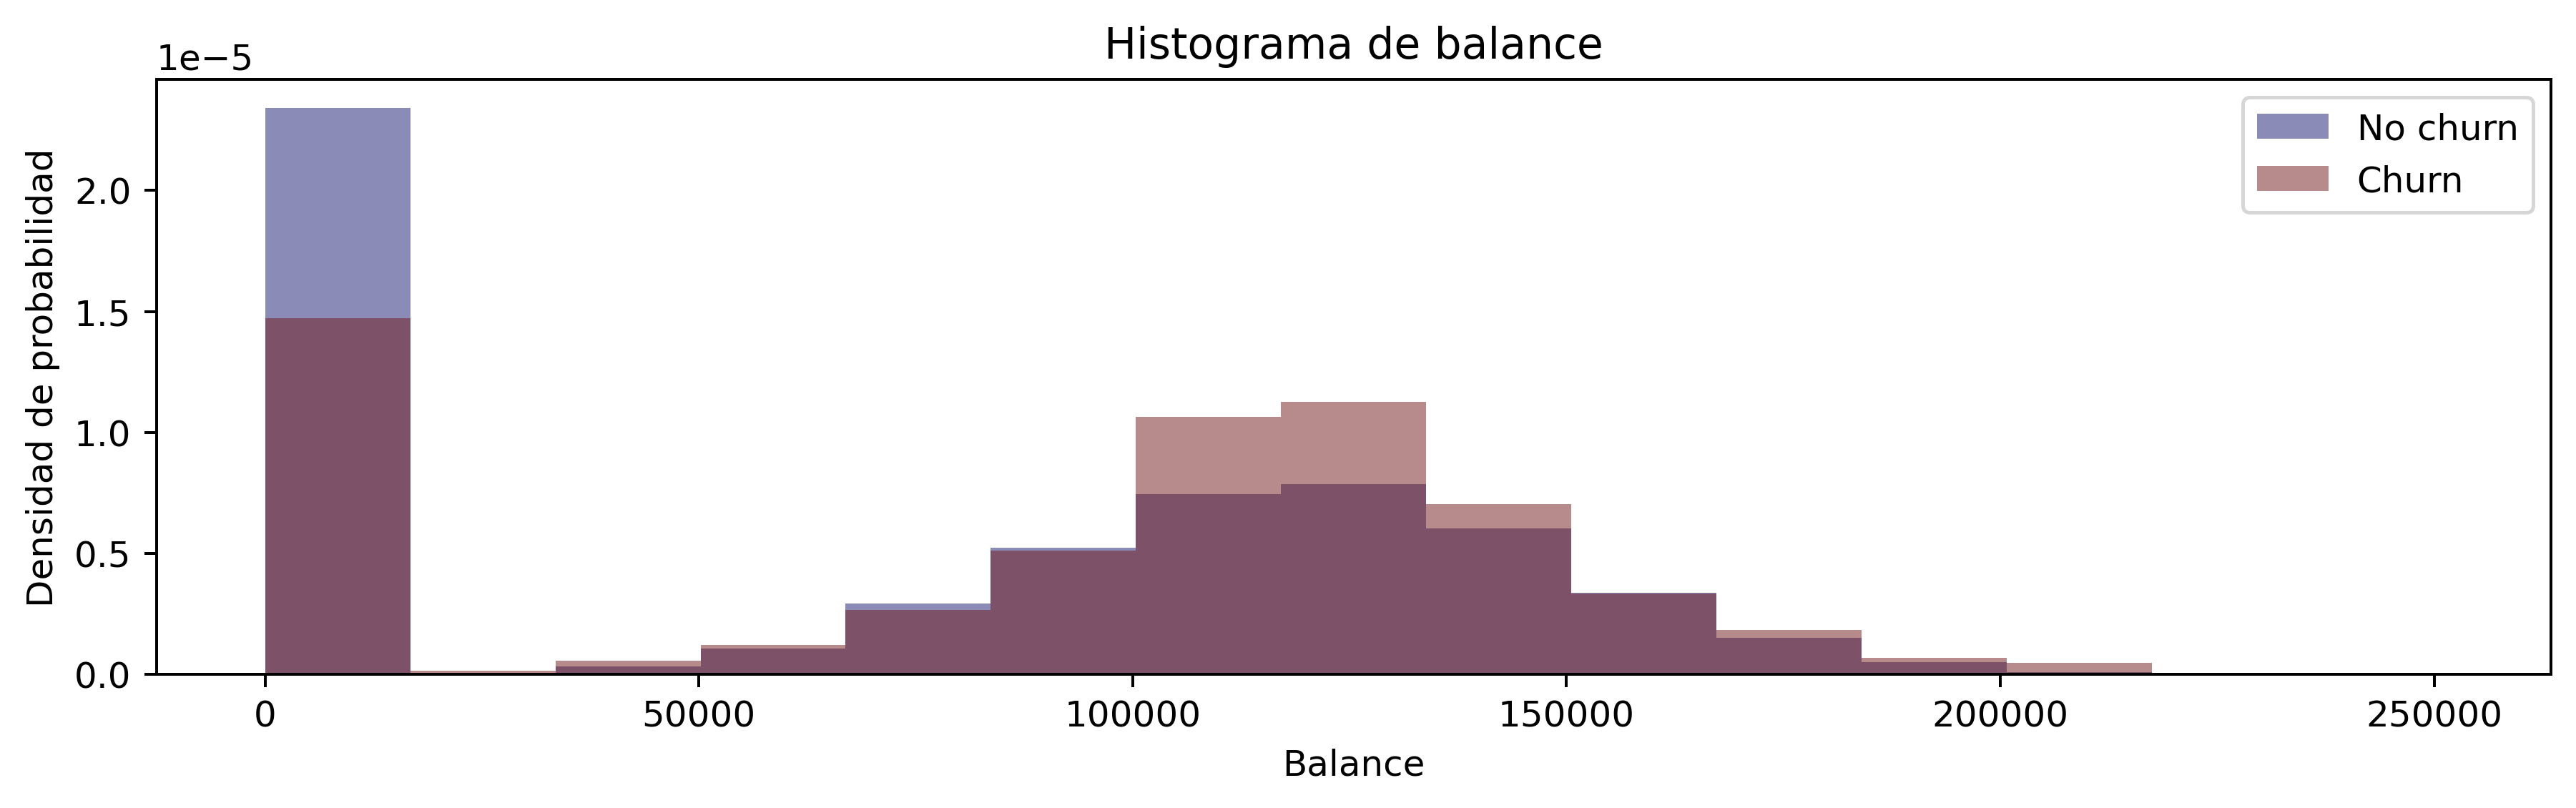

In [16]:
plt.figure(dpi = 360, figsize = (12,3))
plt.hist(df_NoChurn['balance'], bins = 15, color = churn_colors[0], range = [min_balance, max_balance], label = 'No churn', density = True, alpha =0.5)
plt.hist(df_Churn['balance'], bins = 15,   color = churn_colors[1], range = [min_balance, max_balance], label = 'Churn', density = True, alpha = 0.5)
plt.legend()
plt.xlabel("Balance")
plt.ylabel("Densidad de probabilidad")
plt.title('Histograma de balance')
plt.show()

Se puede observar que la distribución de datos es parecida, con la unica diferencia de que existe una gran cantidad de clientes que no han abandonado al banco con un balance de $0 en sus cuentas. Sin duda alguna, esto afecta la distribución de los datos y por lo tanto, atrae la media a valores menores. Eliminaremos estos valores para ambos grupos y observaremos si la distribución de ambos grupos cambia estadísticamente.

In [17]:
df_NoBalance = df_NoChurn[df_NoChurn['balance'] > 0]['balance']
df_Balance = df_Churn[df_Churn['balance'] > 0]['balance']

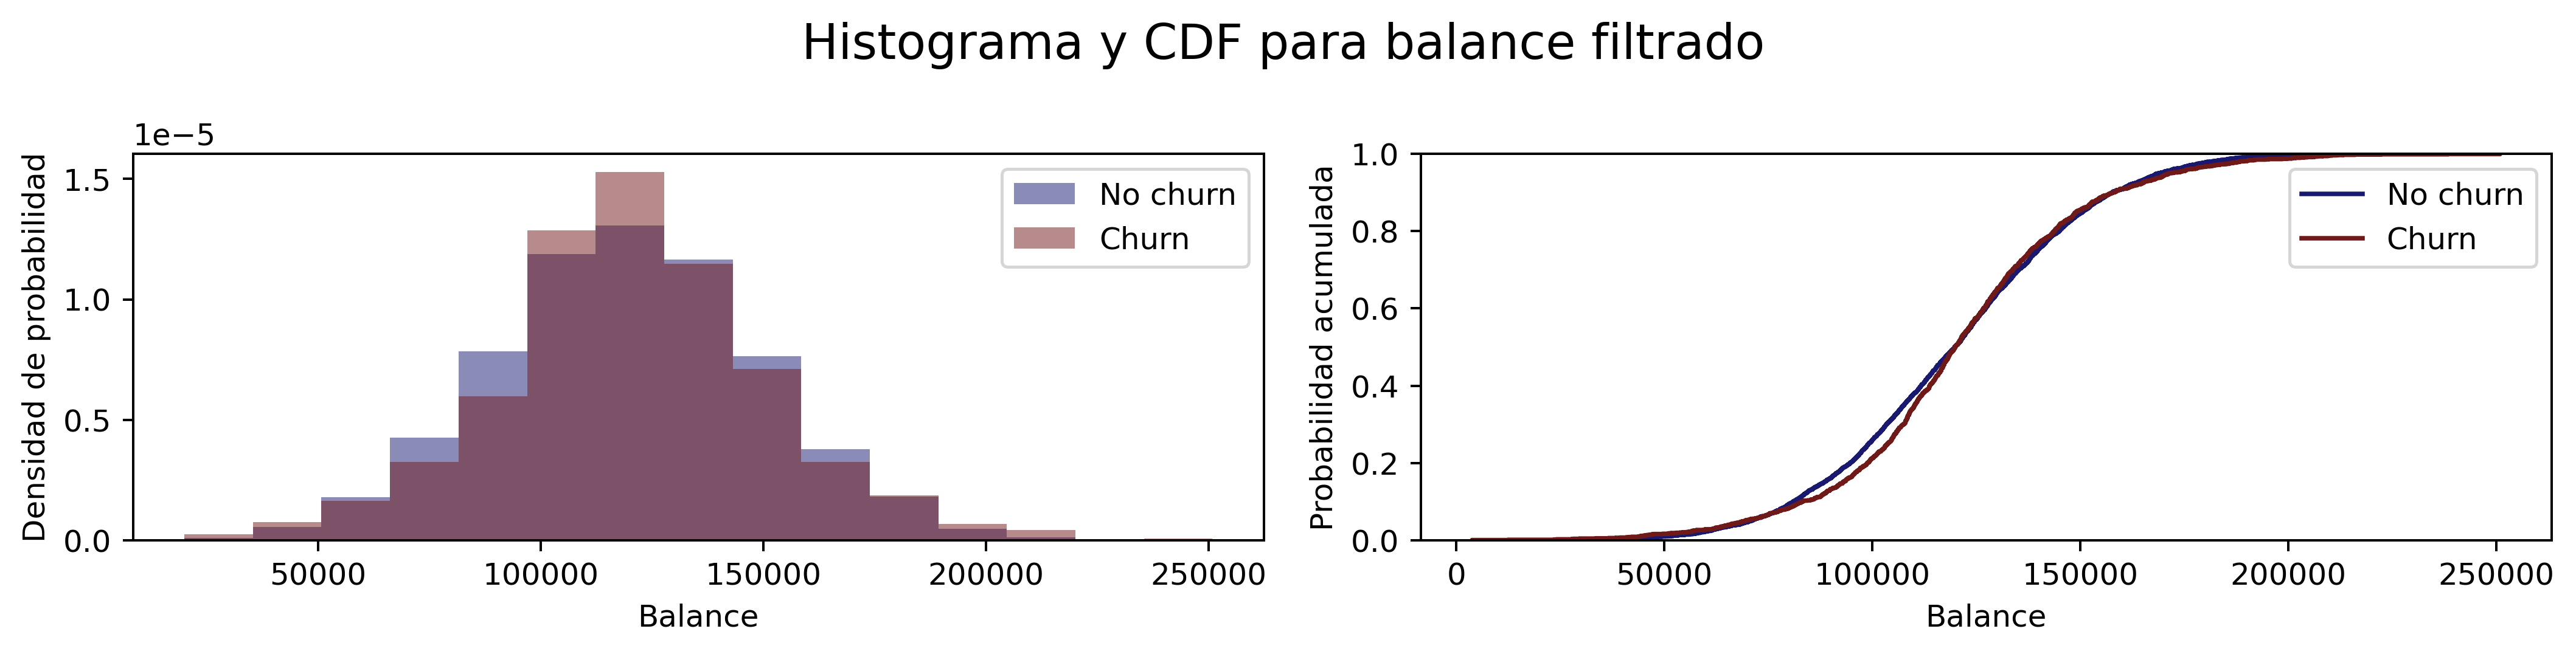

In [18]:
fig, axs = plt.subplots(nrows=1, ncols=2, dpi=360, figsize=(12, 3))
fig.suptitle('Histograma y CDF para balance filtrado', fontsize = 16)
axs[0].hist(df_NoBalance, bins=15, color=churn_colors[0], range=[20000, max_balance], label="No churn",  density = True, alpha = 0.5)
axs[0].hist(df_Balance, bins=15, color=churn_colors[1], range=[20000, max_balance], label="Churn",  density = True, alpha = 0.5)
axs[0].set_xlabel("Balance")
axs[0].set_ylabel("Densidad de probabilidad")
axs[0].legend()
sns.ecdfplot(df_NoBalance, ax=axs[1], color=churn_colors[0], label="No churn")
sns.ecdfplot(df_Balance, ax=axs[1], color=churn_colors[1], label="Churn")
axs[1].set_xlabel("Balance")
axs[1].set_ylabel("Probabilidad acumulada")
axs[1].legend()
plt.tight_layout()
plt.show()


Se puede observar que con este filtro las distribuciones toman formas parecidas. Sin embargo, es necesario aplicar las mismas pruebas estádisticas para corroborar esto. Aplicando las pruebas de Kolmogorov-Smirnov y Mann-Whitney U, se obtiene lo siguiente:

In [19]:
stat = stats.ks_2samp(df_NoBalance, df_Balance)
print(f"Kolmogorov-Smirnov: p-value = {stat.pvalue:.4f}")
res = stats.mannwhitneyu(df_NoBalance, df_Balance)
print(f"Mann-Whitney U: p-value = {res.pvalue:.4f}")

Kolmogorov-Smirnov: p-value = 0.0014
Mann-Whitney U: p-value = 0.2215


Con esto, se observa que si bien la distribución de datos es distinta ($p-value = 0.0014$) la media de los datos es la misma ($p-value = 0.2215$). Vale la pena determinar si las medias entre ambos grupos es distinta con una prueba más rigurosa. Para ello, se realizará una prueba t. Sin embargo, es necesario mostrar normalidad y homogeneidad entre las distribuciones de datos.

In [20]:
x = np.linspace(min_balance, max_balance, 1000)
NoChurn = stats.norm.pdf(x, loc=df_NoBalance.mean(), scale=df_NoBalance.std())
Churn = stats.norm.pdf(x, loc=df_Balance.mean(), scale=df_Balance.std())

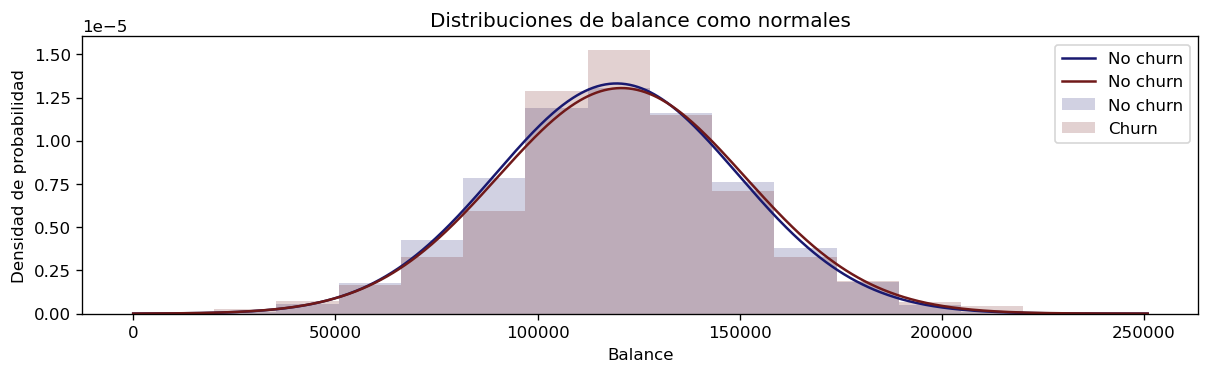

In [21]:
fig, axs = plt.subplots(dpi = 120, figsize = (12,3))
plt.title('Distribuciones de balance como normales')
axs.plot(x, NoChurn, label = 'No churn', color=churn_colors[0])
axs.plot(x, Churn, label = 'No churn', color=churn_colors[1])
axs.hist(df_NoBalance, bins=15, color=churn_colors[0], range=[20000, max_balance], label="No churn",  density = True, alpha = 0.2)
axs.hist(df_Balance, bins=15, color=churn_colors[1], range=[20000, max_balance], label="Churn",  density = True, alpha = 0.2)
axs.set_xlabel("Balance")
axs.set_ylabel("Densidad de probabilidad")
axs.legend()
plt.show()

En la figura superior se observa que los datos del balance filtrado se ajustan muy bien a curvas gaussianas. Se realizará el anáisis estadístico correspondiente para corroborar esto.

In [22]:
res_NoChurn = stats.kstest((df_NoBalance - df_NoBalance.mean())/df_NoBalance.std(), 'norm')
res_Churn= stats.kstest((df_Balance - df_Balance.mean())/df_Balance.std(), 'norm')
print('-----Prueba Shapiro-Wilk para normalidad-----')
print('p-value para balance de clientes que permanecen:', res_NoChurn.pvalue)
print('p-value para balance de clientes que abandonan:', res_NoChurn.pvalue)

-----Prueba Shapiro-Wilk para normalidad-----
p-value para balance de clientes que permanecen: 0.9474815181540325
p-value para balance de clientes que abandonan: 0.9474815181540325


Dado que el p-value es mayor a 0.05 se comprueba que ambas distribuciones siguen una distribución normal. Ahora, es necesario demostrar si ambas muestras son homogeneas.


In [23]:
res = stats.bartlett(df_NoBalance, df_Balance)
print('-----Prueba Barlett para homogeneidad-----')
print('El p-value entre muestras es:', res.pvalue)

-----Prueba Barlett para homogeneidad-----
El p-value entre muestras es: 0.32825574191113016


Dado que tambien son homogéneas, es posible realizar una prueba t clásica. 

In [24]:
res = stats.ttest_ind(df_NoBalance, df_Balance)
print('-----Prueba t para comparación de medias-----')
print('El p-value entre muestras es:', res.pvalue)

-----Prueba t para comparación de medias-----
El p-value entre muestras es: 0.16924734893322796


Dado que el p-value es mayor a 0.05 no se puede demostrar estadísticamente que existe una diferencia entre las medias de los valores del balance filtrado.

A partir del análisis de la función de distribución acumulada (CDF), se observa una concentración significativa de clientes con saldo igual a cero en su cuenta bancaria. Este comportamiento es especialmente marcado en clientes que permanecen en la institución, lo que sugiere que el valor cero en balance representa una condición distinta, posiblemente asociada a cuentas inactivas. Dado que la distribución continua de balance no discrimina eficazmente entre clientes que abandonan y los que permanecen, excepto por la masa concentrada en cero, se propone la adición de una variable binaria que capture dicha condición. Así pues, se crea la variable `nonzero_balance` al conjunto de datos, la cual toma el valor de 1 si el cliente tiene saldo mayor a cero (cuenta activa) y 0 en caso contrario. Esta transformación permite resaltar el *insight* encontrado en la variable continua `balance`

In [25]:
df_raw['nonzero_balance'] = (df_raw['balance']>0).astype(int)

**4. ¿Cómo afecta el número de productos en la permanencia o abandono de clientes? ¿Cómo se asignan estos productos?**

En las anteriores gráficas, se observó que solo los clientes que habían abandonado el banco contaban con 3 o 4 productos, mientras que los que no habían abandonado tenían a lo más 3 productos. De igual forma, en la gráfica de CDF de `products_number`se observó que alrededor del 70% de clientes que han abandodando contaban unicamente con un producto, mientras que los que no han abandonado solo el 45\% tenía un sólo producto. A partir de estas observaciones surgen las siguientes preguntas:

- ¿Existen clientes de *alto valor* que el banco detecta que podrían abandonar la institución y como manera de retención de cliente se les ofrece una mayor cantidad de productos o los clientes que abandonaron regresaron posteriormente debido a que el banco les ofreció más productos? ¿Los clientes decidieron abandonar después de solicitar un determinado servicio extra?
- ¿Por qué existe un gran porcentaje de abandono por parte de clientes que solo cuentan con un solo producto? ¿Acaso deciden abandonar la institución porque buscan tener más productos pero la institución no les proporciona estas prestaciones? Si es así ¿Por qué no les ofrece estas prestaciones? ¿Cuáles son los criterios que el banco sigue para asignar una determinada cantidad de productos?

Para tratar de dar respuesta a estas preguntas, analizaremos las distribuciones de las distintas variables continuas considerando el número de productos que poseen los clientes.

In [26]:
numerical_vars.remove('products_number')

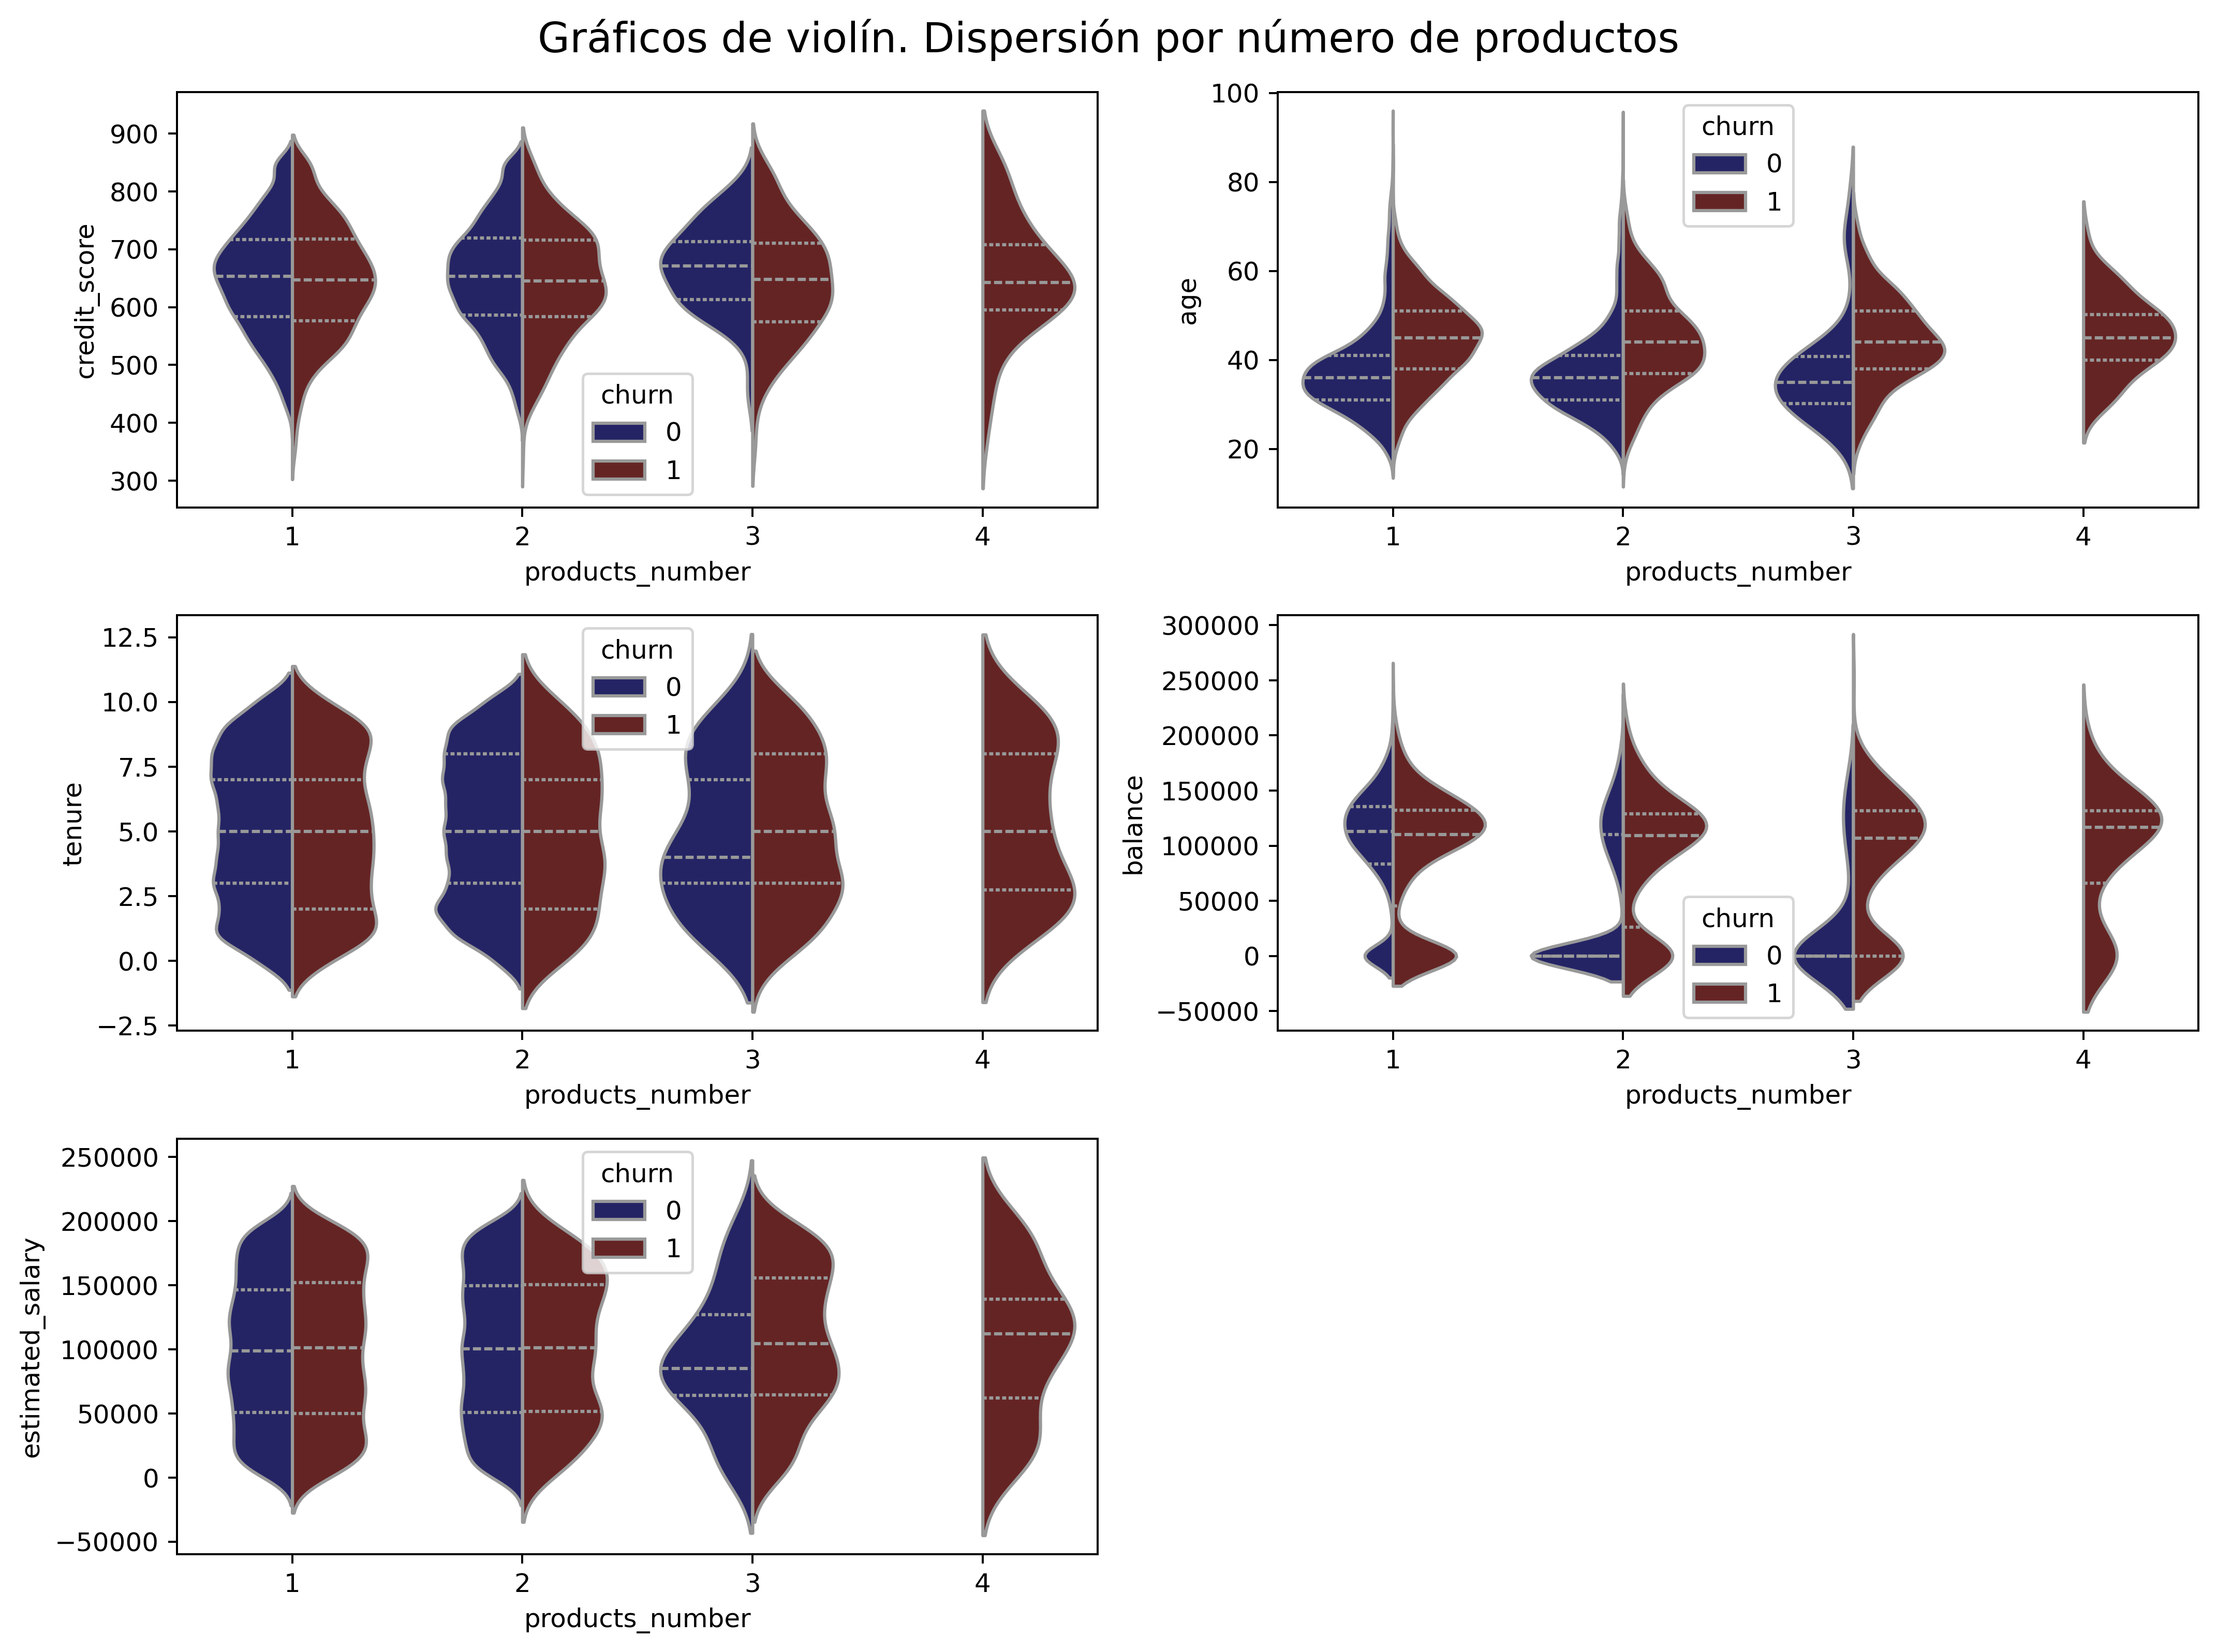

In [27]:
fig, axs = plt.subplots(nrows = 3, ncols = 2, dpi = 360, figsize = (12,9))
fig.suptitle('Gráficos de violín. Dispersión por número de productos', fontsize = 16)
for i, var in enumerate(numerical_vars):
    row, col = divmod(i,2)
    sns.violinplot(data=df_raw, y=var, hue ='churn' , x = 'products_number',
                   palette=churn_colors, split=True, inner='quart', fill = True, linecolor = '#999999', ax = axs[row, col])
    axs[row][col].set_ylabel(var)
fig.delaxes(axs[2, 1])
plt.tight_layout()
plt.show()

A partir de las gráficas se pueden establecer las siguientes observaciones:
- La más evidente: Todos los clientes que poseen 4 productos son clientes que han abandonado la institución en algún momento.
- El `credit_score` parece no tener relevancia para la asignación del número de productos.
- La variable `age` parece no tener relevancia para la asignación del número de productos.
- Los años de antigüedad `tenure` parece no tener relevancia para la asignación del número de productos.
- Existe un gran porcentaje de clientes que deciden abandonar el banco cuando tienen un sólo producto y no tienen saldo en su cuenta bancaria. Por su parte, la cantidad de saldo ingresado en cuenta (`balance`) parece no ser relevante para la asignación del número de productos para personas que no han abandonado, pues para clientes con 2 o 3 productos su saldo promedio es de $\$0$. **Sería conveniente tener una tercera variable que hable permita identidicar cuando un cliente abandona la institución y posteriormente se vuelve a incorporar, para observar las métricas que cambia el banco con este tipo de personas. Se sugiere el uso de variables binarias para determinar si el cliente tiene un servicio en especifico en lugar de número de productos** 
- El `estimated_salary` parece no tener relevancia para la asignación del número de productos.

Como no es posible observar patrones que ayuden a determinar como se asignan el número de productos se realizarán unas gráficas de *pairwise plot* para así determinar cluster o combinaciones de variables para determinar el número de productos asignados por cliente.

In [28]:
numerical_vars.append('products_number')
numerical_NoChurn = df_NoChurn[numerical_vars]
numerical_Churn = df_Churn[numerical_vars]

<Figure size 640x480 with 0 Axes>

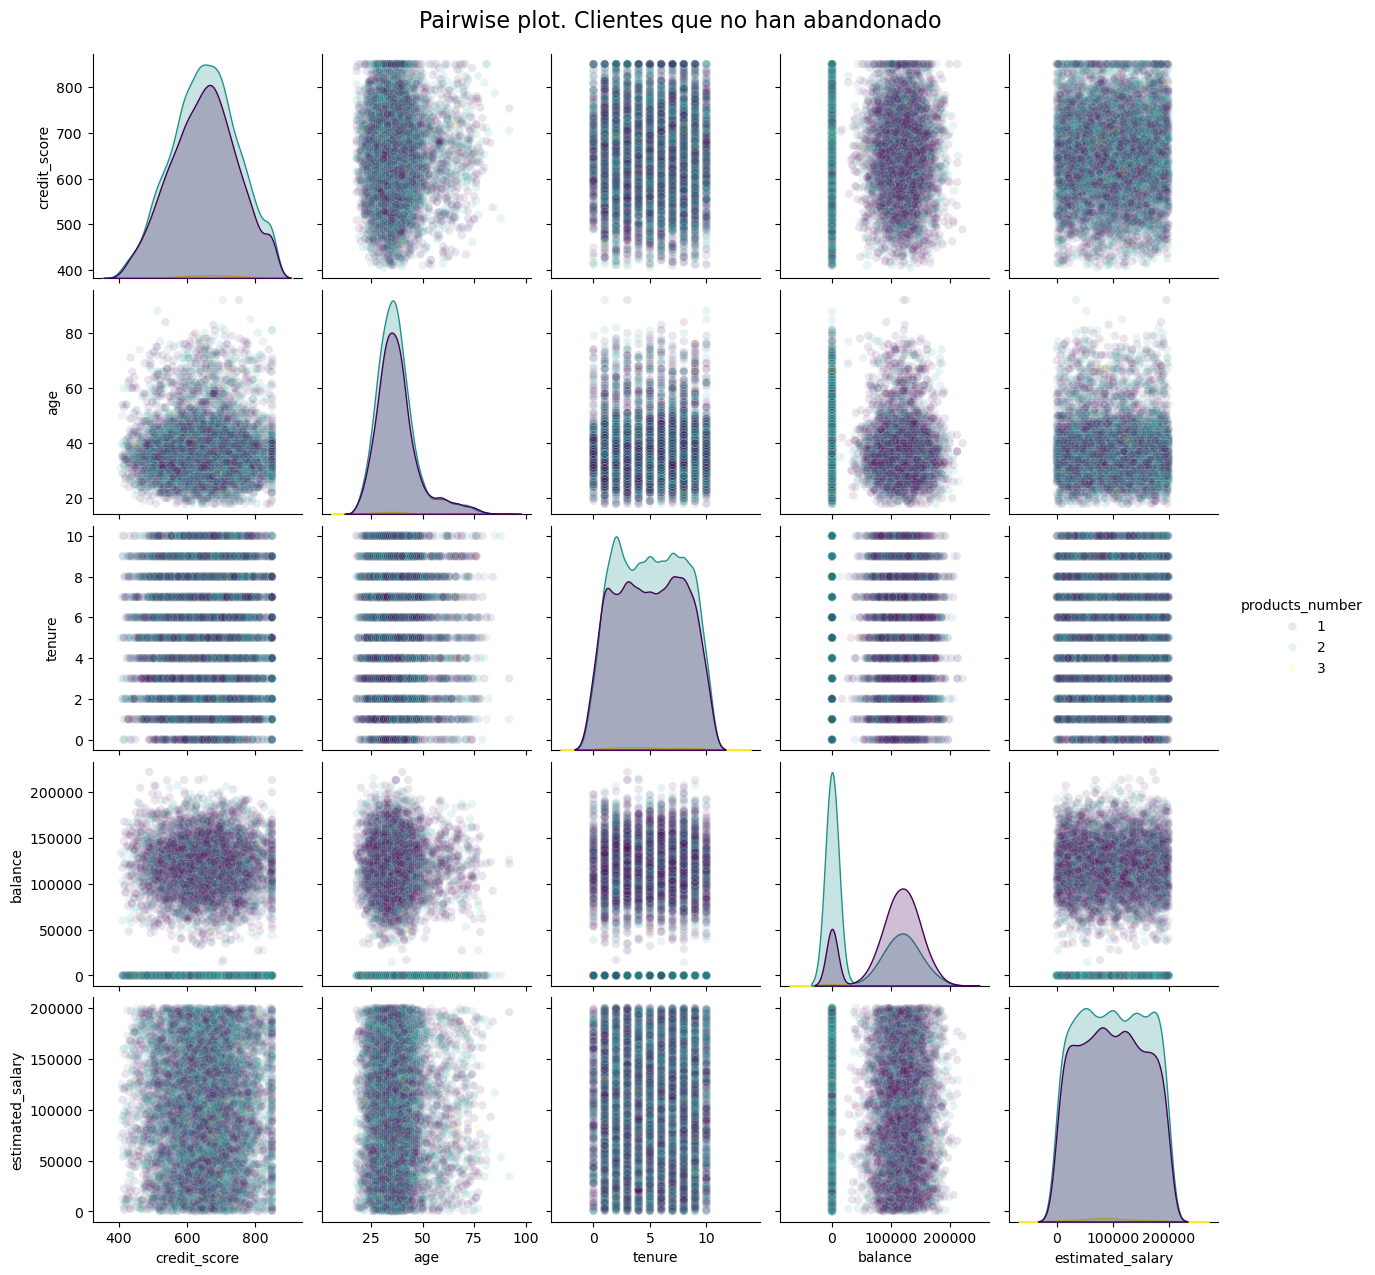

In [29]:
plt.figure()
g = sns.pairplot(numerical_NoChurn, hue='products_number', palette='viridis', plot_kws={'alpha': 0.1})
g.fig.suptitle('Pairwise plot. Clientes que no han abandonado', y=1.02, fontsize = 16)
plt.show()

<Figure size 640x480 with 0 Axes>

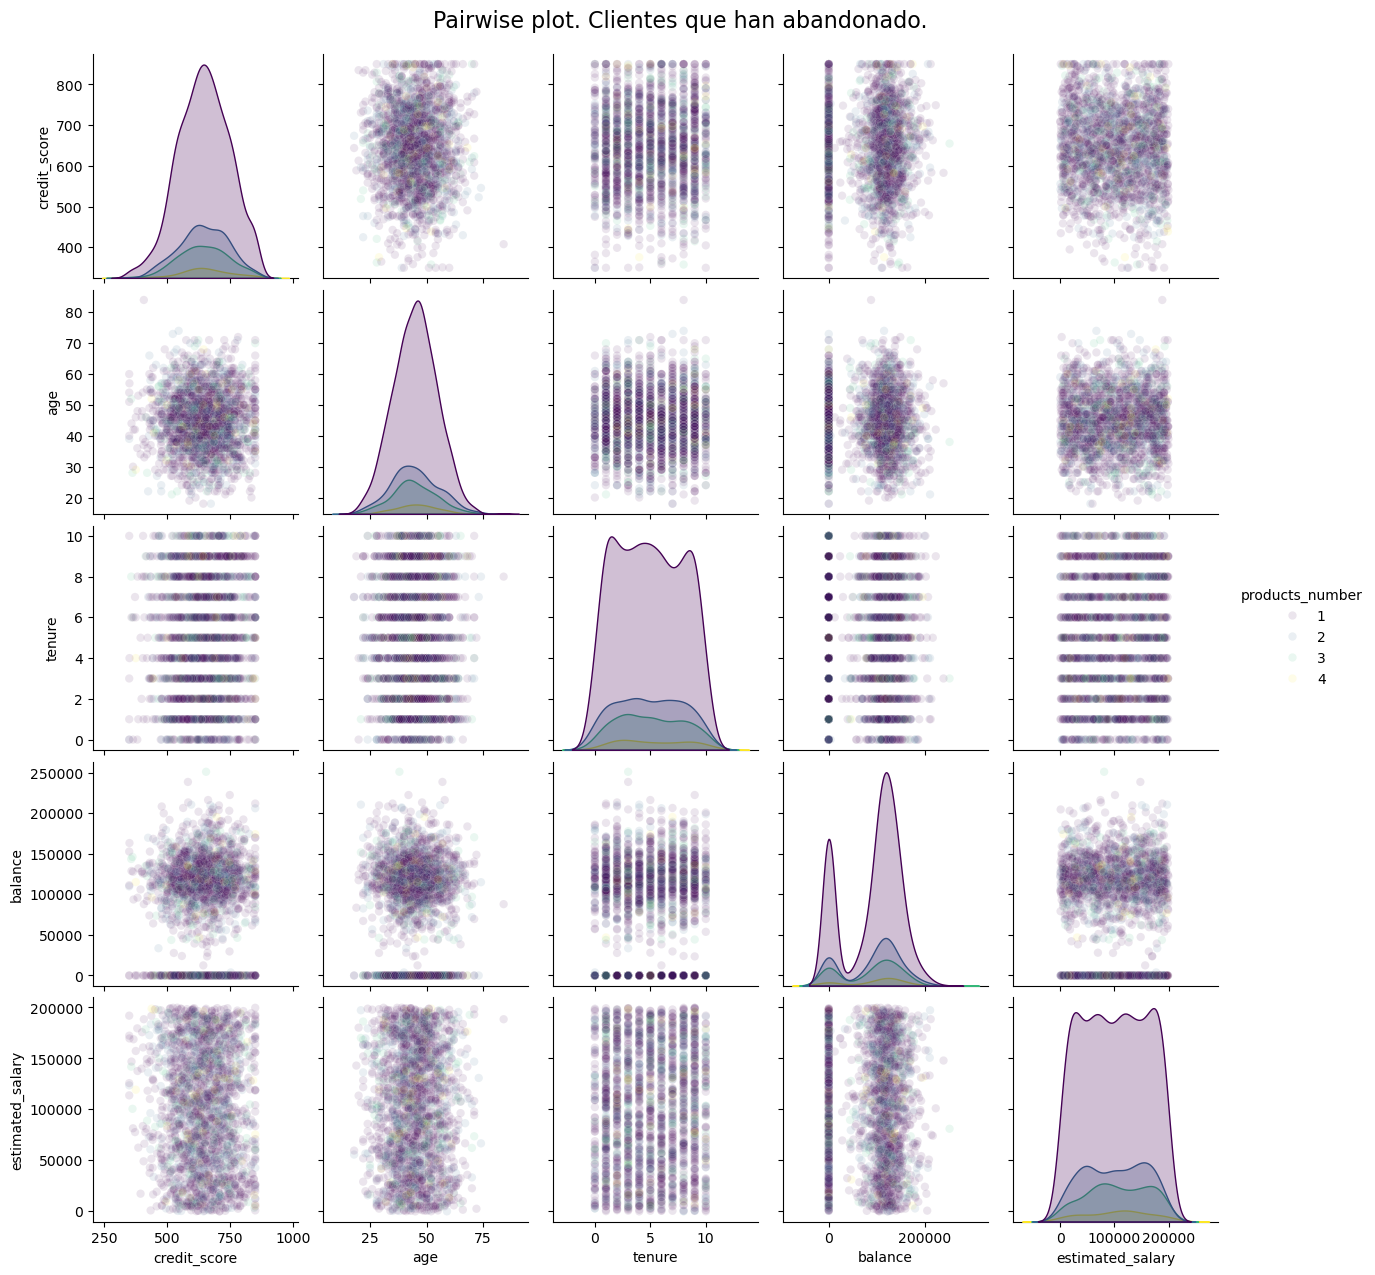

In [30]:
plt.figure()
g = sns.pairplot(numerical_Churn, hue='products_number', palette='viridis', plot_kws={'alpha': 0.1})
g.fig.suptitle('Pairwise plot. Clientes que han abandonado.', y=1.02, fontsize = 16)
plt.show()

En principio, no es posible encontrar clusters con las variables numéricas que permitan determinar cómo se asigna el grupo de productos, a los clientes por lo que **se sugiere implementar un modelo que permita predecir el número de productos dadas las otras variables**.

Por último, analizaremos si existen correlaciones entre las distintas variables numéricas.

In [31]:
corr_churn = df_Churn[numerical_vars].corr()
corr_no_churn = df_NoChurn[numerical_vars].corr()

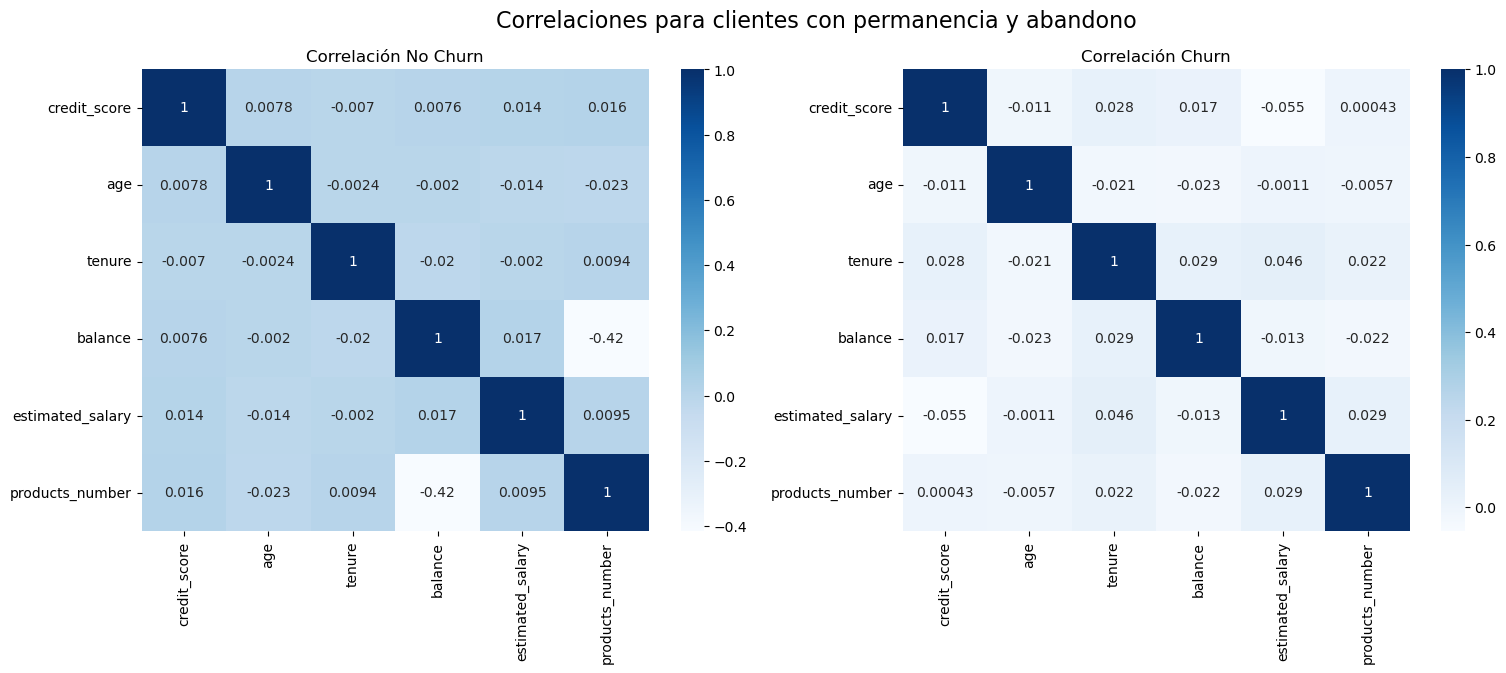

In [32]:
fig, axs = plt.subplots(1, 2, figsize=(18,6))
plt.suptitle('Correlaciones para clientes con permanencia y abandono', fontsize = 16)
sns.heatmap(corr_no_churn, annot=True, cmap='Blues', ax=axs[0])
axs[0].set_title('Correlación No Churn')
sns.heatmap(corr_churn, annot=True, cmap='Blues', ax=axs[1])
axs[1].set_title('Correlación Churn')
plt.show()

Como se puede observar, la única variable que parece estar correlacionada de manera descendente es el número de productos y balance para las personas que no han abandonado. Esta correlación se puede observar en la figura del gráfico de violín, distribución por número de productos. Si se observa la parte variable de balance se observa que la asignación de productos se mantiene en mayor cantidad para aquellos que tienen un saldo de $\$0$. Sin embargo, como se mencionó, esto solo ocurre para las personas que no han abandonado. Parece no existir correlaciones claras entre las distintas variables para las personas que han abandonado. 

Una vez analizadas las distribuciones con las variables numéricas, se analizarán las distribuciones con las variables categóricas.

### Análisis de variables discretas

In [33]:
categorical_vars = ['country', 'gender', 'credit_card', 'active_member', 'nonzero_balance']

Se graficará una figura de barras para cada una de las variables categóricas, separadas en lsa respectivas clases de permanencia (No churn) y abandono (Churn)

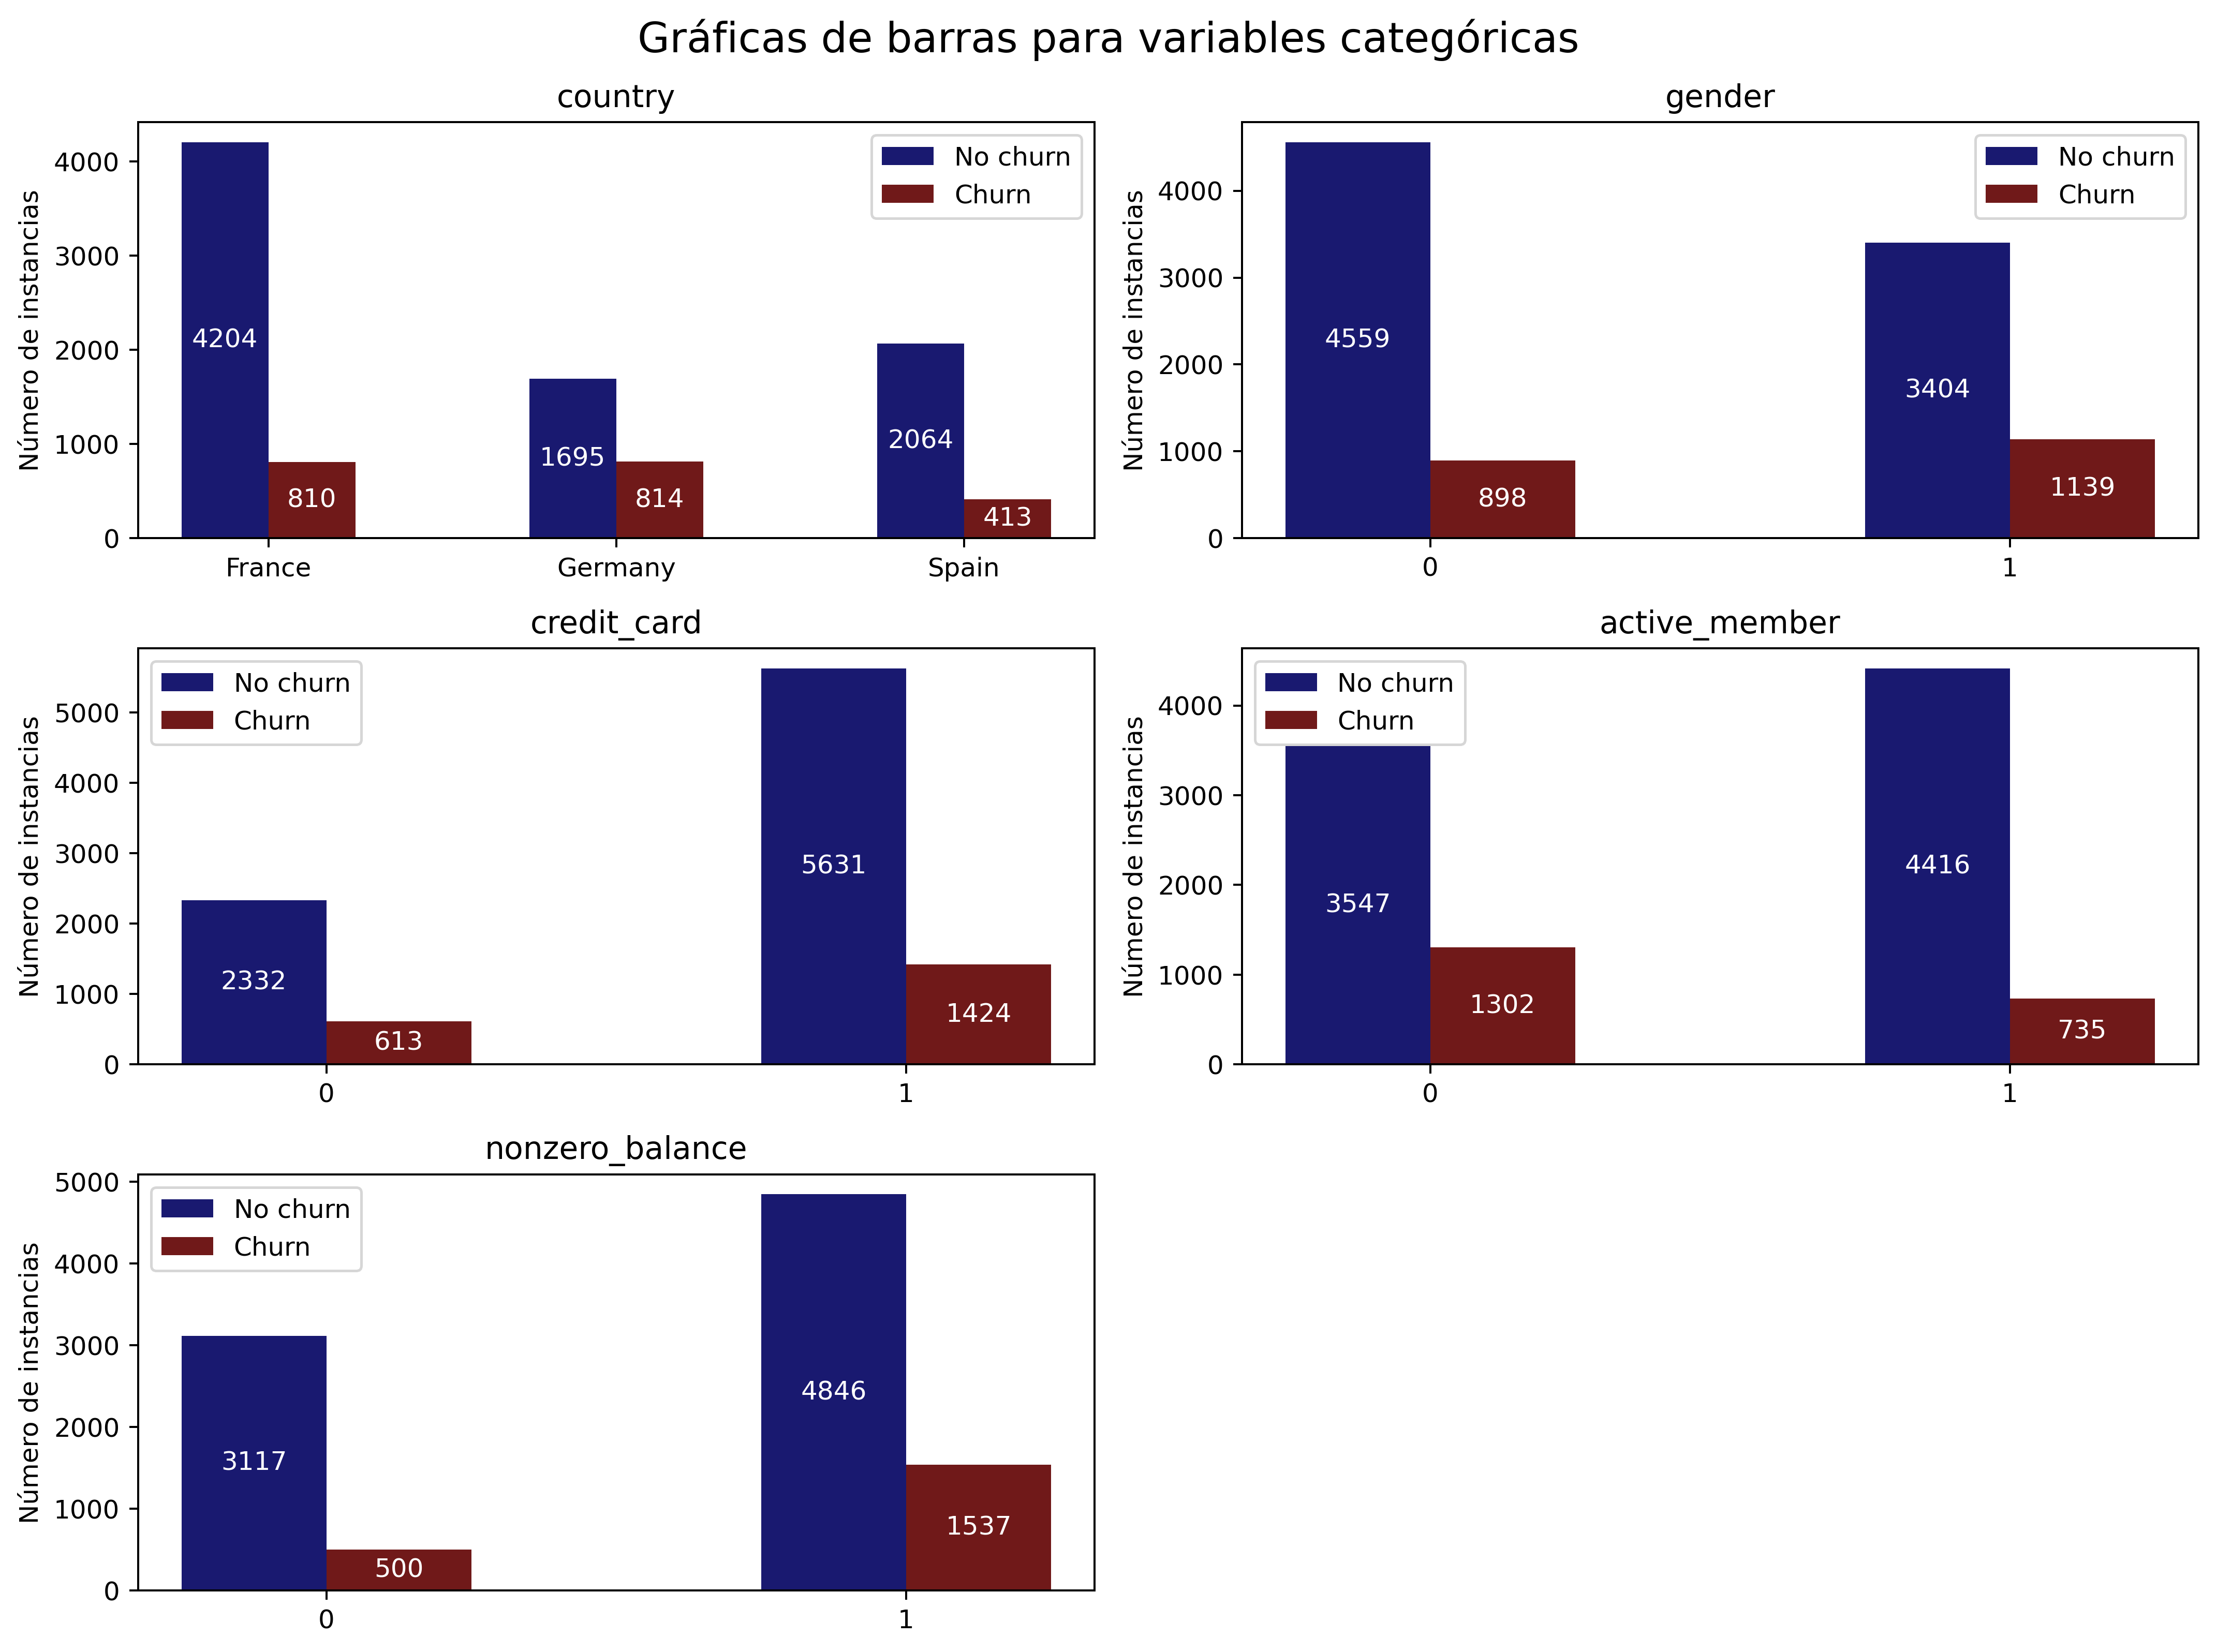

In [34]:
width = 0.25
fig, axs = plt.subplots(nrows = 3, ncols = 2, figsize = (12,9), dpi = 360)
for i, var in enumerate(categorical_vars):
    row, col = divmod(i,2)
    classes = np.sort(df_raw[var].unique()).tolist()
    data = np.zeros(len(classes))
    x_pos = np.arange(len(classes))
    for churn in range(2):
        for j, label in enumerate(classes):
            data[j] = ((df_raw[var]==label) & (df_raw['churn']==churn)).sum()
        offset = width * churn
        label_churn = 'Churn' if churn else 'No churn'
        p = axs[row,col].bar(x_pos + offset, data, width, label = label_churn, color = churn_colors[churn])
        axs[row, col].bar_label(p, fmt='%.0f', label_type='center', color = 'White')
    axs[row,col].set_title(var)
    axs[row,col].set_ylabel('Número de instancias')
    axs[row,col].set_xticks(x_pos + width/2, classes)
    axs[row,col].legend()
fig.delaxes(axs[2, 1])
plt.suptitle('Gráficas de barras para variables categóricas', fontsize = 16)
plt.tight_layout()
plt.show()

Con estas gráficas podemos realizar las siguientes observaciones:
- La mayor cantidad de clientes provienen de Francia, teniendo menos clientes de Alemania. Sin embargo, se observa que las proporiciones entre de abandono o permanencia de cada país cambia. Esto se analizará a continuación.
- La mayoría de clientes son del género masculino.
- Un gran porcentaje de los clientes tienen tarjeta de crédito, sin embargo, hay que revisar si las proporciones son parecidas entre clientes que tienen y abandonan y los clientes que no los que no tienen y abandonan.
- La mayoría de los clientes que se consideran clientes activos poseen una baja cantidad de clientes con abandono, por el contrario, los clientes que no son considerados activos poseen una mayor cantidad de clientes con abandono, a pesar de que el conjunto completo es minoría.
- Se observa que la mayoría de los clientes tienen activas sus cuentas y que son estos los que tienden a abandonar más, caso contrario a los que no tienen activas sus cuentas que tienen un mayor porcentaje de clientes que tienden a quedarse en la institución.
  
Para poder descubrir patrones y factores que contribuyen más al abandono se ralizará una gráfica de barras acumulada.

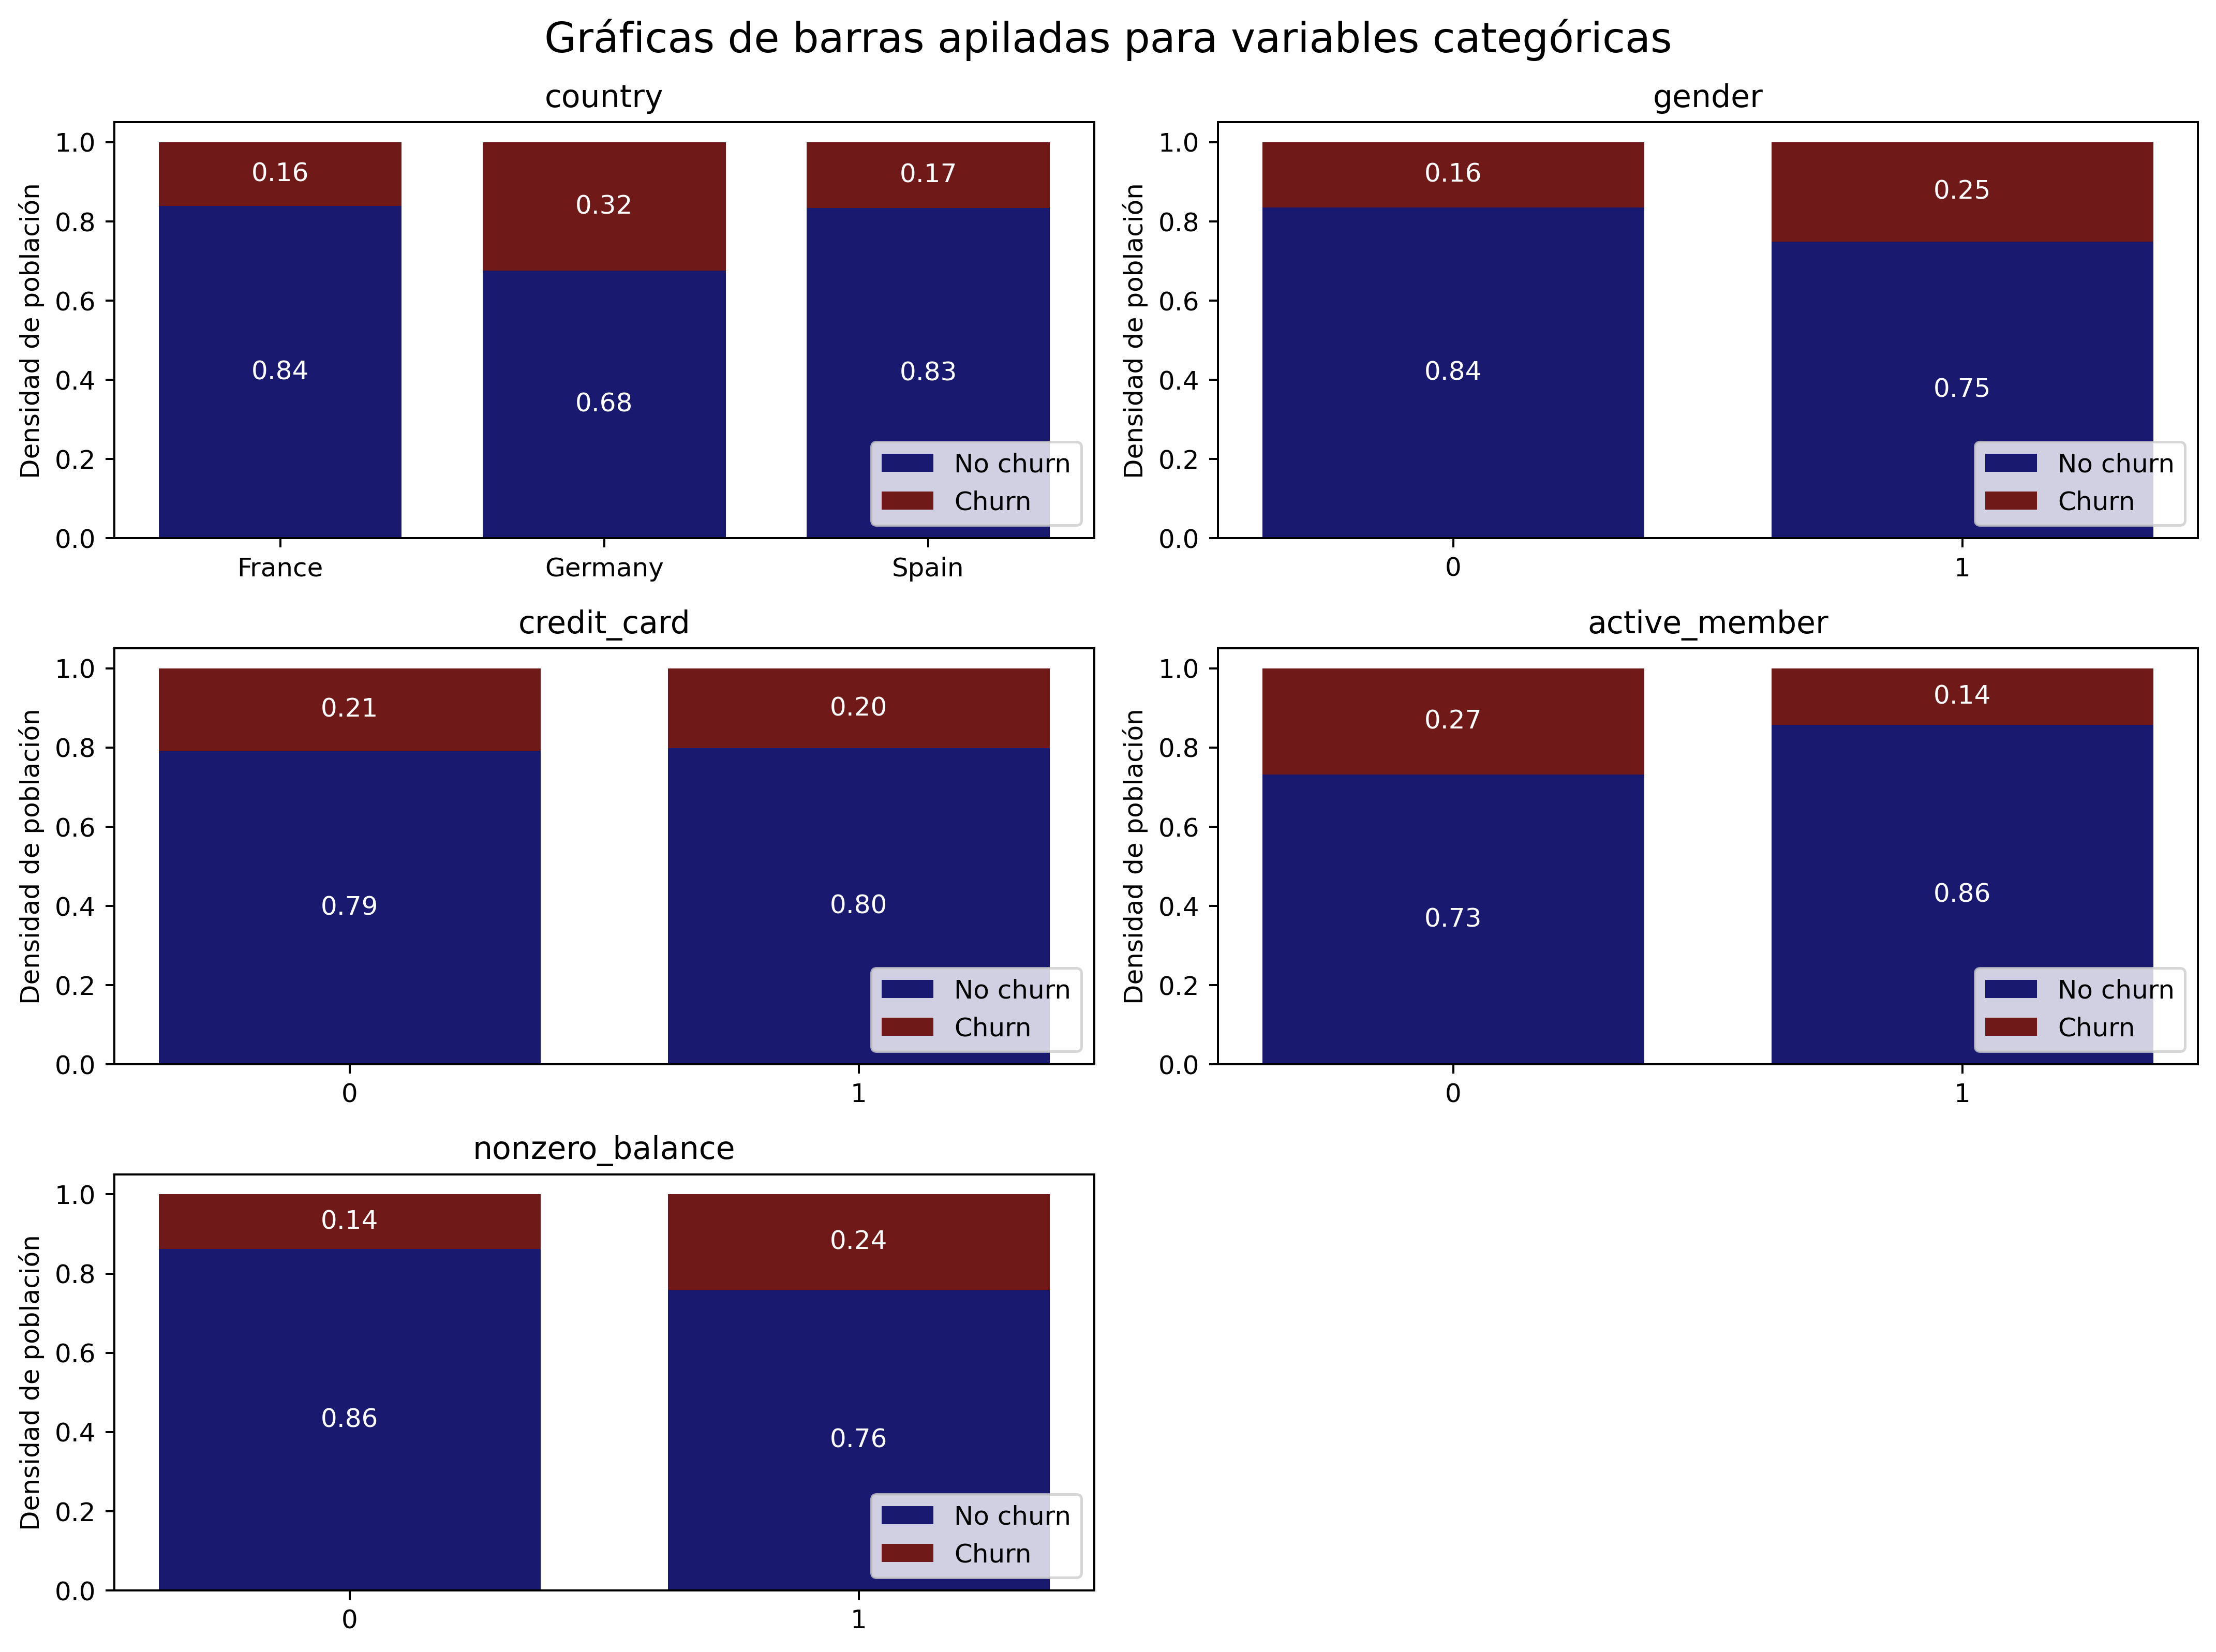

In [35]:
width = 0.75

fig, axs = plt.subplots(nrows = 3, ncols = 2, figsize = (12,9), dpi = 360)
for i, var in enumerate(categorical_vars):
    row, col = divmod(i,2)
    
    classes = np.sort(df_raw[var].unique()).tolist()

    data = np.zeros((2, len(classes)))
    x_pos = np.arange(len(classes))
    bottom = np.zeros(len(classes))
    
    for j, label in enumerate(classes):
        data[0,j] = ((df_raw[var]==label) & (df_raw['churn']==0)).sum()
        data[1,j] = ((df_raw[var]==label) & (df_raw['churn']==1)).sum()

    data = data/data.sum(axis = 0)
    for j in range(2):
        label_churn = 'Churn' if j else 'No churn'
        p = axs[row,col].bar(x_pos, data[j,:], width, label = label_churn, color = churn_colors[j], bottom = bottom)
        bottom += data[j,:]
        axs[row, col].bar_label(p, fmt='%.2f', label_type='center', color = 'White')
    axs[row,col].set_title(var)
    axs[row,col].set_ylabel('Densidad de población')
    axs[row,col].set_xticks(x_pos, classes)
    axs[row,col].legend(loc="lower right")
fig.delaxes(axs[2, 1])
plt.suptitle('Gráficas de barras apiladas para variables categóricas', fontsize = 16)
plt.tight_layout()
plt.show()

Con esta gráfica se puede observar como se distribuyen las proporciones de clases en las distintas variables.
- Se observa que la mayor proporción de clientes que abandonan son clientes de Alemania, mientras que la proporción de Francia y España es similar entre estas y menor a la de Alemania.
- Se observa que las mujeres tienden a abandonar más la institución bancaria que los hombres.
- Parece ser que poseer tarjeta de credito no afecta la permanencia de clientes.
- La proporción de clientes que abandonan es más grande en los clientes inactivos que activos.
- La proporción de clientes que no tienen activas sus cuentas tienden a permanecer en el banco.

Si bien, es posible destacar estos patrones de manera visual, es necesario realizar un análisis estadístico que valide dichas afirmaciones. Es por ello que se realizará una prueba de independencia de chi cuadrada $\chi^2$ el cual nos permitirá determinar que variables no son independendientes de que un cliente permanezca o deserte.

Se propone como hipotesis nula $H_0$ que:
- La variable `var` es estadísticamente independiente para que un cliente permanezca o abandone el banco. (No afecta)

Se realiza el análisis estadístico con un $5\%$ de significancia.

In [38]:
for var in categorical_vars:
    tabla = pd.crosstab(df_raw[var], df_raw['churn'])
    chi2 = stats.chi2_contingency(tabla, correction=(tabla.shape == (2,2)))
    if chi2.pvalue < 0.05:
        print(f"{var}: Se descarta H0 con p = {chi2.pvalue:.4f}")
    else:
        print(f"{var}: No se descarta H0 con p = {chi2.pvalue:.4f}")     

country: Se descarta H0 con p = 0.0000
gender: Se descarta H0 con p = 0.0000
credit_card: No se descarta H0 con p = 0.4924
active_member: Se descarta H0 con p = 0.0000
nonzero_balance: Se descarta H0 con p = 0.0000


Los resultados obtenidos sugieren que variables como país de origen, género, actividad del miembro y tener saldo en la cuenta cuenta, tienen una influencia significativa en el estado de permanencia del cliente. En contraste, la variable relacionada con la adquisición de tarjeta de crédito no muestra evidencia suficiente de relevancia.

En principio, uno podría asumir que si un cliente se encuentra activo es porque tiene dinero en su cuenta, dado que las distribuciones en las figura de las gráficas de frecuencia acumulada presentan proporciones parecidas. Sin embargo, que existe la misma proporción no significa que sea el mismo porcentaje de clientes los cuales realicen lo mismo. Es por ello que se realizará un análisis de dependencia entre estas dos variables mediante una prueba $\chi^2$ para las distintas clases de pertenencia.

In [39]:
df_NoChurn = df_raw[df_raw['churn']==0]
df_Churn = df_raw[df_raw['churn']==1]

In [40]:
crosstab_NoChurn = pd.crosstab(df_NoChurn['active_member'], df_NoChurn['nonzero_balance'])
crosstab_Churn = pd.crosstab(df_Churn['active_member'], df_Churn['nonzero_balance'])

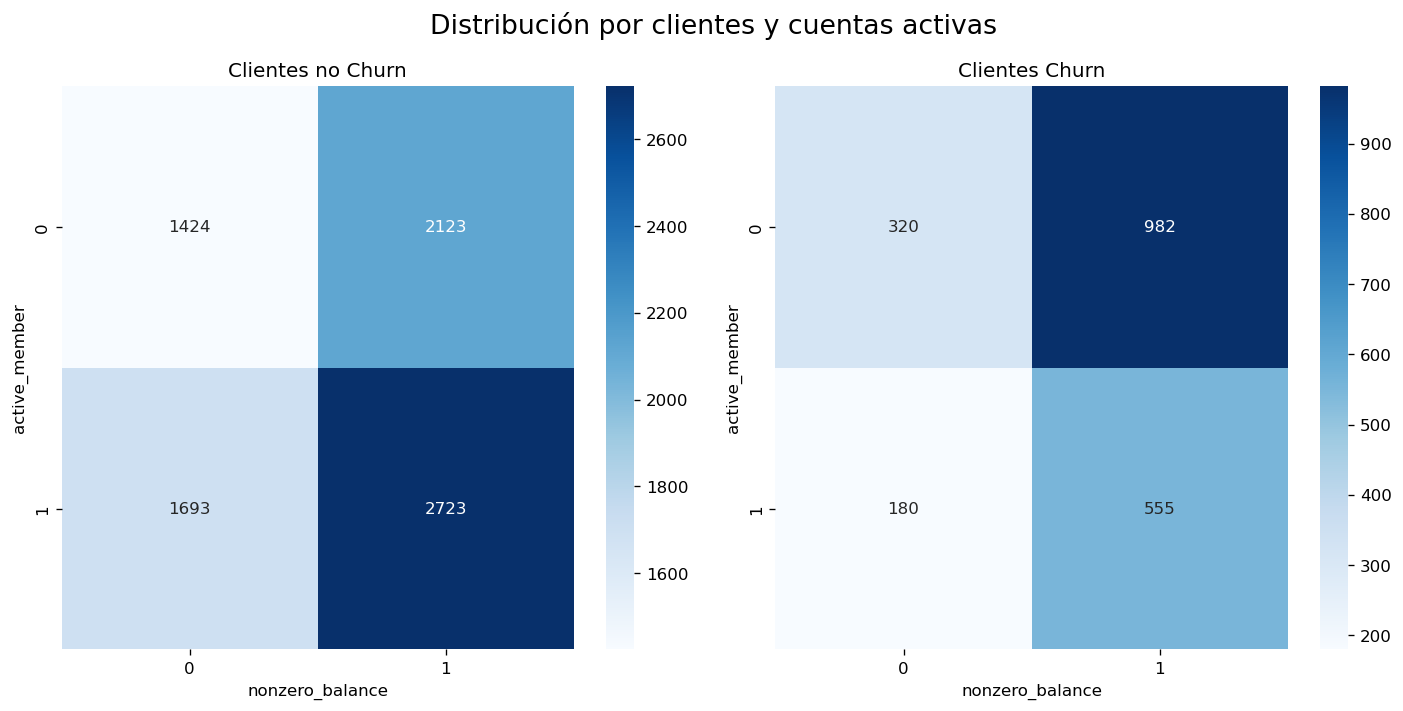

In [41]:
fig, axs = plt.subplots(1, 2, figsize=(12,6), dpi = 120)
plt.suptitle('Distribución por clientes y cuentas activas', fontsize=16)
sns.heatmap(crosstab_NoChurn, annot=True, cmap='Blues', fmt = 'd', ax=axs[0])
axs[0].set_title('Clientes no Churn')
sns.heatmap(crosstab_Churn, annot=True, cmap='Blues', fmt = 'd', ax=axs[1])
axs[1].set_title('Clientes Churn')
plt.tight_layout()
plt.show()

In [43]:
tabla = pd.crosstab(df_Churn['active_member'], df_Churn['nonzero_balance'])
chi2 = stats.chi2_contingency(tabla, correction=(tabla.shape == (2,2)))
if chi2.pvalue < 0.05:
    print(f"Se rechaza H₀: Existe relación entre ser cliente activo y tener saldo positivo (p = {chi2.pvalue:.4f})")
else:
    print(f"No se rechaza H₀: No hay evidencia de relación entre cliente activo y tener saldo positivo. Las variables son independientes. (p = {chi2.pvalue:.4f})")


No se rechaza H₀: No hay evidencia de relación entre cliente activo y tener saldo positivo. Las variables son independientes. (p = 1.0000)


## Resumen de análisis exploratorio

Una vez concluido el análisis de variables categóricas, se realizará el resumen de los insights encontrados:

1. Estadísticamente no existe diferencia entre la distribución de clientes que han abandonado y permanecen en las variables `tenure` y `estimated_salary`.
2. Existe una gran concentración de clientes que no han abandonado el banco y que tienen un saldo de $0 en sus cuentas bancarias. Debido a que la distribución del balance de los clientes no cambia significativamente para ambos tipos de clientes (a excepción de esta concentración) se genera una variable binaria denomida 'nonzero_balance', el cual permite destacar esta concentración inicial.
3. En principio, no existen patrones especificos para determinar el número de productos que tendrán los clientes. Se sugiere la implementación de variables categóricas que permitan identificar con que productos cuenta el cliente en lugar de su número. Además se propone crear un modelo que permita predecir la cantidad de productos que tienen los clientes dadas las distintas variables.
4. Existe una relación negativamente proporcional entre el número de productos y el balance para clientes que no han abandonado el banco. Parece ser que clientes que permanecen en el banco y no tienen saldo en sus cuentas, o cuentan con poco saldo se les proporcionan más productos.
5. Los clientes alemanes son los que más suelen abandonar, en proporción.
6. Los clientes inactivos, en proporción, son los que más suelen abandonar. 
7. En proporción, los clientes que tienen dinero ingresado en sus cuentas tienden a abandonar más que aquellos que no tienen dinero en su cuenta. 
8. No existe relaciónn entre la actividad del cliente y si este tiene o no saldo en su cuenta.

In [ ]:
def stratified_split(X,Y,rate_partition, seed = None, as_array = None):
    X_columns = X.columns
    X = X.to_numpy()
    Y = Y.to_numpy()
    rate_partition = np.array(rate_partition)
    
    classes, n_classes = np.unique(Y, return_counts=True)
    
    rng = np.random.default_rng(seed)          # ← único RNG
    id_shuffled = rng.permutation(len(Y))      # ← usa el mismo RNG
    X, Y = X[id_shuffled], Y[id_shuffled]
    
    X_train = []
    Y_train = []
    X_val = []
    Y_val = []
    X_test = []
    Y_test = []

    for i in range(len(classes)):
        X_k = X[Y==classes[i]]
        Y_k = Y[Y==classes[i]]
        n_split = (n_classes[i]*rate_partition).astype(np.int64)
        n_train, n_val, n_test = n_split
        
        X_train.append(X_k[:n_train])
        Y_train.append(Y_k[:n_train])
        X_val.append(X_k[n_train:n_train+n_val])
        Y_val.append(Y_k[n_train:n_train+n_val])
        X_test.append(X_k[n_train+n_val:])
        Y_test.append(Y_k[n_train+n_val:])
            
    X_train = np.vstack(X_train)
    Y_train = np.concatenate(Y_train)
    X_val   = np.vstack(X_val)
    Y_val   = np.concatenate(Y_val)
    X_test  = np.vstack(X_test)
    Y_test  = np.concatenate(Y_test)
    
    if not(as_array):
        X_train = pd.DataFrame(data = X_train, columns = X_columns)
        X_val = pd.DataFrame(data = X_val, columns = X_columns)
        X_test = pd.DataFrame(data = X_test, columns = X_columns)

    return X_train, Y_train, X_val, Y_val, X_test, Y_test

In [ ]:
Y = df['churn']
X = df.drop(columns = ['customer_id', 'churn'])
rate_partition = [0.70, 0.15, 0.15]

In [ ]:
X_train, Y_train, X_val, Y_val, X_test, Y_test = stratified_split(X, Y, rate_partition, seed=2, as_array=False)

In [ ]:
n_train = X_train.shape[0]

In [ ]:
n_bins = int(1+(np.log(n_train)/np.log(2)))
print(f'Número de clases (Sturges) {n_bins}')

In [ ]:
fig, axs = plt.subplots(nrows = 3, ncols=2, dpi = 120, figsize = (12,6))
for i in range(len(numerical_vars)):
    row = int(i/2)
    col = i-2*row
    axs[row,col].hist(X_train[numerical_vars[i]], bins = n_bins, color = '#191970')
    axs[row,col].set_title(numerical_vars[i])
plt.tight_layout()
plt.show()

In [ ]:
fig, axs = plt.subplots(nrows = 3, ncols=2, dpi = 120, figsize = (12,6))
for i in range(len(numerical_vars)):
    row, col = divmod(i,2)
    axs[row,col].scatter(X_train[numerical_vars[i]], Y_train, alpha = 0.01, color = '#191970')
    axs[row,col].set_title(numerical_vars[i])
plt.tight_layout()
plt.show()

No es posible observar una variable que separe claramente la pertenencia a una determinada clase de `churn`. Sin embargo, es posible destacar algunos $insight$:
1. Las personas con un `credit_score` por debajo de 400 suelen dejar el banco.
2. Las personas con una edad mayor a 75 no suelen abandonar.
3. Las personas un número de 4 productos (`products_number`) suelen tener abandono.
   
Es necesario hacer un análisis a estos datos para asegurarse de que no sean casos aislados.

In [ ]:
churn_colors = ['#191970','#701919']

In [ ]:
fig, axs = plt.subplots(nrows = 2, ncols=2, dpi=120, figsize = (12,6))
for i, categorical_var in enumerate(categorical_vars):
    row, col = divmod(i,2)
    labels = X_train[categorical_var].unique() # Extratendo etiquetas por categoría
    
    # Contando instancias
    counting_label = np.zeros((len(labels), 2), dtype=int)
    for j, label in enumerate(labels):
        counting_label[j, 0] = ((X_train[categorical_var] == label) & (Y_train == 0)).sum()
        counting_label[j, 1] = ((X_train[categorical_var] == label) & (Y_train == 1)).sum()

    # Graficando barras
    x = np.arange(len(labels))
    width = 0.25
    multiplier = 0
    for churn in range(2): # Graficando barras por pertenencia
        rects = axs[row][col].bar(x + width*churn, counting_label[:,churn], width, color=churn_colors[churn], label =f'Churn: {churn}')
        axs[row][col].bar_label(rects)
    axs[row][col].set_title(f'{categorical_var}')
    axs[row][col].legend()
    axs[row][col].set_xticks(x+0.5*width, labels)
    axs[row][col].set_ylim(0, 1.1*counting_label.max())
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.linear_model import LogisticRegression

In [ ]:
encoder = OneHotEncoder()
data = encoder.fit_transform(X_train['country'].values.reshape(-1, 1)).toarray()

In [ ]:
X_train = pd.concat([X_train.drop("country", axis = 1), pd.DataFrame(data, columns = encoder.categories_[0])], axis = 1)

In [ ]:
X_train.head()

In [ ]:
X_train['gender'] = X_train['gender'].map({'Male': 0, 'Female': 1})
X_columns = X_train.columns

In [ ]:
scaler = MinMaxScaler()

In [ ]:
X_train = scaler.fit_transform(X_train)

In [ ]:
X_train = pd.DataFrame(X_train, columns = X_columns)

In [ ]:
X_train.describe()

In [ ]:
X_train.head()

In [ ]:
clf_LR = LogisticRegression()
clf_LR.fit(X_train, Y_train)

In [ ]:
Y_hat = clf_LR.predict(X_train)

In [ ]:
print(Y_hat)

In [ ]:
Y_train

In [ ]:
np.abs(Y_hat-Y_train).sum()

In [ ]:
## Probando nuevo pull

Es fundamental revisar la distribución de la variable objetivo (`churn`), ya que esta información permitirá tomar decisiones informadas sobre la estrategia de partición del conjunto de datos. En particular, si existe un desequilibrio de clases significativo, será necesario aplicar técnicas como muestreo estratificado o métodos de balanceo para garantizar que el modelo aprenda adecuadamente ambas clases.